## Материалы
 <p><a href ="https://disk.yandex.ru/i/VRZSFljnw7EDng">Ссылка на презентацию.</a>  </p>
 <p><a href ="https://public.tableau.com/views/Final_16450154878820/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link">Ссылка на простенький дашборд.</a>  </p>

## Этап 1. Импортирование библиотек  и данных. Первичное знакомство с данными

###  1.1 Импортирование библиотек

Импортируем необходимые библиотеки для нашей работы, также применим определенные настройки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from plotly import graph_objects as go
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
from scipy import stats as st
from pymystem3 import Mystem
from collections import Counter

pd.options.display.float_format = '{:,.2f}'.format
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 1.2 Чтение файлов и  первичное знакомство с данными

Прочитаем данные и сохраним их в переменную **data**:

In [3]:
data = pd.read_csv("ecommerce_dataset.csv")

Посмотрим на 10 случайных строк датасета:

In [4]:
data.sample(10)

,date,customer_id,order_id,product,quantity,price
6356,2019091908,af40cb4c-f3da-41b9-be8d-836481f129f9,72690,Коврик придверный PHP SRL 50х80 см Format Clas...,1,"1,349.00"
3425,2019050711,1a725b7e-f09b-4bc1-8579-b9893adb91f8,14729,Петуния Свитуния Sweetunia Johnny Flame малино...,1,90.00
4442,2019060409,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Огурец Кристина ячейки по 6 шт Е6,1,120.00
3093,2019042416,8f68d6f2-f183-4644-8abb-3295a58405ee,14686,Петуния махровая рассада однолетних цветов в к...,1,210.00
3419,2019050708,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,Сумка-тележка 2-х колесная Gimi Argo красная,1,"1,087.00"
3735,2019051402,ff31d802-dae6-484d-a3dc-c9723f1cb538,71363,Стремянки Colombo Leonardo 2 ступени G300A02W ...,1,"2,999.00"
6154,2019082209,34e3f413-b858-42b8-a2d3-79e5c8a3e8d7,72367,"Коврик придверный с дизайном, из резины и коко...",1,"1,642.00"
3186,2019042614,7e472253-66b6-4b16-abde-448d6531d319,14697,Рассада зелени для кухни Мелисса лимонная зеле...,1,89.00
1328,2018122319,ce0e2f13-d360-4ab5-a970-261d25e770e8,69534,Фоторамка Alparaisa на 7 фотографий бронзовая ...,1,300.00
1922,2019022015,d220a441-2ed1-428e-8f3f-966beb50bd0e,70373,Герань домашняя (пеларгония зональная) цветуща...,2,157.00


Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут». В нем присутствуют такие колонки как:
- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

Посмотрим на общую информацию по датасету:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


In [6]:
print('Данные содержат: {} строк;\n\t\t {} столбцов.'.format(data.shape[0], data.shape[1]))

Данные содержат: 6737 строк;
		 6 столбцов.


**Вывод:** На первый взгляд данные в хорошем качестве, предоставлено 6737 строк и 6 столбцов. Единственное, в дальнейшем, необходимо изменить тип данных у даты.

## Этап 2. Предобработка данных

### 2.1 Проверка на наличие пропусков


Посмотрим имеются ли пропуски в количественном и процентном соотношении и если есть, то сколько их:

In [7]:
find_null = data.isnull().sum().to_frame().rename(columns= {0: 'count'}) # Количество пропусков , переведенное во фрейм и переименованный столбец
find_null['percent'] = find_null['count'] / data.shape[0] * 100 # Вычисление процента пропусков
find_null.sort_values('count')

,count,percent
date,0,0.00
customer_id,0,0.00
order_id,0,0.00
product,0,0.00
quantity,0,0.00
price,0,0.00


**Вывод:** В датасете пропуски отстуствуют. 

### 2.2 Проверка на наличие дубликатов

Посмотрим встречаются ли в датасете дубликаты:

In [8]:
data.duplicated().sum()

0

Явных дубликатов не наблюдается. Изучим данные подробнее, проверим принадлежит ли каждому заказу уникальный пользователь:

In [9]:
not_uniq =(data.groupby('order_id'). 
           agg({'customer_id': 'nunique'}).
           sort_values('customer_id',ascending = False).
           query('customer_id > 1'))
not_uniq.head()

,customer_id
order_id,
72845,4
71480,3
69485,3
69310,2
69833,2


Как можно заметить, встречаются заказы у которых 2 и более пользователя, посчитаем количество таких заказов:

In [10]:
print('Количество заказов, в которых несколько пользователей:', len(not_uniq))

Количество заказов, в которых несколько пользователей: 29


Посмотрим на данные заказы:

In [11]:
data.query('order_id in @not_uniq.index')

,date,customer_id,order_id,product,quantity,price
512,2018102822,0b5ce2c7-acef-4a9a-b821-61a44ed05557,68785,"Сиденье в ванну раздвижное, белый, СВ5, НИКА",1,374.00
538,2018103021,c1dd5c0e-51db-4a5d-91a3-5374cb20043d,68785,"Сиденье в ванну раздвижное, белый, СВ5, НИКА",1,374.00
1154,2018121012,2f955596-4b13-432e-93f3-6433395aafe6,69283,Сушилка для белья на батарею НИКА СБ6-65 двухъ...,1,164.00
1160,2018121016,e3805ccd-2d64-4d0e-92dd-902293555c35,69283,Сушилка для белья на батарею НИКА СБ6-65 двухъ...,1,164.00
1177,2018121121,954172a5-634c-4a50-941d-9db6d15a7377,69310,"Муляж Груша желтый 9,5 см полиуретан",7,59.00
...,...,...,...,...,...,...
6508,2019100408,25a8cd52-3efa-48ee-a6bd-d413d7e2b42f,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.00
6538,2019100720,2ac05362-3ca7-4d19-899c-7ba266902611,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.00
6576,2019101022,31a39955-8a93-42f3-8839-04a9693632a7,72778,Шеффлера Голд Капелла d-12 см h-25 см,1,149.00
6601,2019101315,b1dbc7c4-3c84-40a7-80c9-46e2f79d24ad,72950,Кастрюля эмалированная Стэма С-1624 12 л цилин...,1,974.00


Обратим внимание, что данные заказы имеют также одинаковую позицую, отличаются лишь датой совершения заказа. Можно предположить, что данные заказы обновляются автоматически по датеи времени до отмены заказа или совершения оплаты, таким образом актуальным будет считаться последний заказ в логе. Различия в идентификаторе пользователей можно объяснить уникальностью mac-адреса с разных устройств. К примеру, с компьютера будет один mac-адрес, с телефона другой, каждое устройство имеет свой mac-адрес, соответственно поэтому и фиксируются уникальные пользователи.

Так, как ранее было обращено внимание на одинаковые позиции, при идентичных номерах заказа, проверим дубли еще раз, с учетом следующих параметров:

In [12]:
data[data.duplicated(['order_id','product'])]

,date,customer_id,order_id,product,quantity,price
58,2018100218,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,"3,299.00"
59,2018100219,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,"3,299.00"
60,2018100220,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,"3,299.00"
63,2018100304,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,"3,299.00"
94,2018100413,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,68522,Эвкалипт Гунни d-17 см h-60 см,1,"1,409.00"
...,...,...,...,...,...,...
6706,2019102810,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,Сумка-тележка 2-х колесная Gimi Argo красная,1,"1,087.00"
6711,2019102821,cb65d08a-dae7-4890-aef0-bb9f79055e02,73108,Мирт d-9 см h-15 см,1,134.00
6728,2019103100,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.00
6729,2019103102,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.00


Таким образом можно увидеть еще 1920 дубликатов в датасете, различающихся как минимум в дате. Так как ранее был сделан вывод о том, что актуальным считается последний заказ, то удалим дубли, оставив последний заказ:

In [13]:
data = data.drop_duplicates(subset = ['order_id','product'], keep = 'last')

Посмотрим сколько строк осталось в датасете:

In [14]:
data.shape[0]

4817

Таким образом удалили 1920 дублей. Проверим остались ли заказы, в которых более 2 уникальных пользователей:

In [15]:
(data.groupby('order_id'). 
           agg({'customer_id': 'nunique'}).
           sort_values('customer_id',ascending = False).
           query('customer_id > 1'))

,customer_id
order_id,
69485,2


Остался лишь один заказ, посмотрим на него:

In [16]:
data.query('order_id == 69485')

,date,customer_id,order_id,product,quantity,price
1282,2018122016,5be0f4b4-947f-4672-b147-73ef5936ecd4,69485,Набор столовых приборов 24 предмета SAINT GERM...,1,"1,087.00"
1384,2018122623,e0461045-4fcc-4731-8837-509f6534512a,69485,Набор столовых приборов 24 предмета FARANDOLE ...,1,"1,274.00"


В данном заказе изменилась позиция и заказ был завершен стоимостью 1274  ден.ед.. Оставим его, удалив заказ с изначальным содержанием:

In [17]:
data.drop([1282], inplace = True)

Проверим данный заказ еще раз:

In [18]:
data.query('order_id == 69485')

,date,customer_id,order_id,product,quantity,price
1384,2018122623,e0461045-4fcc-4731-8837-509f6534512a,69485,Набор столовых приборов 24 предмета FARANDOLE ...,1,"1,274.00"


**Вывод:** В ходе обнаружения дубликатов, явных обнаружено не было, однако при тщательном изучении датасета, были найдены заказы, которые имеют 2 и более пользователя, при проверке таких заказов, также были обнаружены дубликаты другого рода, в которых при идентичной нумерации заказа, были также идентичные товарные позиции, все это является дубликатами, которые были удалены.

### 2.3 Работа с типами данных

Ранее было обращено внимание что в столбце **date** необходимо изменить тип данных, изменим:

In [19]:
data['date'] = pd.to_datetime(data['date'], format = '%Y%m%d%H')

Посмотрим на полученный результат:

In [20]:
data['date'].sample(random_state = 2).to_frame()

,date
2108,2019-03-01 14:00:00


**Вывод:** Успешно изменили тип данных для времени.

### 2.4 Добавление необходимых столбцов

Добавим в датасет столбец с общей выручкой по заказу:

In [21]:
data['revenue'] = data['quantity'] * data['price']

Также добавим в датасет такие столбцы как год, месяц, неделя, порядковый номер недели, день, час:

In [22]:
data['order_year'] = data['date'].dt.year # год
data['order_month'] = data['date'].astype('datetime64[M]').dt.strftime('%Y-%m') # меся
data['order_week'] = data['date'].dt.day_name() # названия дня недели
data['numb_week'] = data['date'].dt.week # номер недели в году
data['order_day'] = data['date'].dt.date # дата
data['order_hours'] = data['date'].dt.hour # время


Помимо этого создадим функции для определения буднего и выходного дня, а также для дневнего и вечернего времени:

In [23]:
def is_weekend(order_week):
    """Данная функция определяет выходной/будний день.
    
    На вход передается день недели, на выходе возвращает будний/выходной день недели
    """
    if order_week == 'Saturday' or order_week == 'Sunday':
        return 'weekend'
    else:
        return 'weekday'

В функции для определения времени суток, примем условие, что дневное время с 9-00 до 17-00 включительно, вечернее время возьмем с 18 до 8 утра утра включительно:

In [24]:
def is_daytime(order_hours):
    """Данная функция определяет дневное/вечернее время.
    
    На вход передается время, на выходе возвращает дневное/вечернее время дня
    """
    if 9 <=order_hours <= 17 :
        return 'daytime'
    else:
        return 'evening_time'

Применим данные функции:

In [25]:
data['is_weekend'] = data['order_week'].apply(is_weekend) # Создание столбца с будним/выходным днем недели
data['is_daytime'] = data['order_hours'].apply(is_daytime) # Создание столбца дневного/вечернего времени

Посмотрим на итоговый датафрейм:

In [26]:
data.head(2)

,date,customer_id,order_id,product,quantity,price,revenue,order_year,order_month,order_week,numb_week,order_day,order_hours,is_weekend,is_daytime
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.00,142.00,2018,2018-10,Monday,40,2018-10-01,0,weekday,evening_time
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.00,194.00,2018,2018-10,Monday,40,2018-10-01,0,weekday,evening_time


**Вывод:** Успешно добавили необходимые столбцы с временными показателями.

## Этап 3. Исследовательский анализ данных(EDA)

### 3.1 За какой период данные

Посмотрим за какой период предоставлены данные:

In [27]:
print('Данные предоставлены с {} по {} '.format(data['date'].min(), data['date'].max()))

Данные предоставлены с 2018-10-01 00:00:00 по 2019-10-31 16:00:00 


In [28]:
class color:
   
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

print(color.BOLD + 'Вывод:' + color.END, 'Таким образом в нашем распоряжении данные за {}'.format(data['date'].max() - data['date'].min()))

Вывод: Таким образом в нашем распоряжении данные за 395 days 16:00:00


### 3.2 Общая статистическая информация

Познакомимся с основной статистической информацией по датасету:

In [29]:
data

,date,customer_id,order_id,product,quantity,price,revenue,order_year,order_month,order_week,numb_week,order_day,order_hours,is_weekend,is_daytime
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.00,142.00,2018,2018-10,Monday,40,2018-10-01,0,weekday,evening_time
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.00,194.00,2018,2018-10,Monday,40,2018-10-01,0,weekday,evening_time
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.00,112.00,2018,2018-10,Monday,40,2018-10-01,0,weekday,evening_time
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.00,179.00,2018,2018-10,Monday,40,2018-10-01,0,weekday,evening_time
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.00,112.00,2018,2018-10,Monday,40,2018-10-01,0,weekday,evening_time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.00,404.00,2019,2019-10,Thursday,44,2019-10-31,11,weekday,daytime
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,"1,087.00","1,087.00",2019,2019-10,Thursday,44,2019-10-31,12,weekday,daytime
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.00,157.00,2019,2019-10,Thursday,44,2019-10-31,13,weekday,daytime
6735,2019-10-31 14:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.00,397.00,2019,2019-10,Thursday,44,2019-10-31,14,weekday,daytime


In [30]:
print('Количество заказов в логе - ', len(data))
print('Количество уникальных пользователей -', data['customer_id'].nunique())
print('Количество уникальных заказов -', data['order_id'].nunique())
print('Количество уникальных наименований продукции - ', data['product'].nunique())
print('Минимальное количество купленного товара в одном заказе-', data['quantity'].min())
print('Максимальное количество купленного товара в одном заказе -', data['quantity'].max())
print('Среднее значение количества купленного товара в одном заказе -', round(data['quantity'].mean(),2))
print('Медианое значение количества купленного товара в одном заказа -', int(data['quantity'].median()))
print('Количество проданного товара за все время -', data['quantity'].sum())
print('Минимальная цена товара - ', int(data['price'].min()))
print('Максимальная цена товара - ', int(data['price'].max()))
print('Средняя цена товара -', int(data['price'].mean()))
print('Медианая цена товара -', int(data['price'].median()))
print('Минимальная сумма заказа -', int(data['revenue'].min()))
print('Максимальная сумма заказа -', int(data['revenue'].max()))
print('Средняя сумма заказа -', int(data['revenue'].mean()))
print('Медианная сумма заказа -', int(data['revenue'].median()))
print('Сумма дохода за все время-', int(data['revenue'].sum()))

Количество заказов в логе -  4816
Количество уникальных пользователей - 2421
Количество уникальных заказов - 2784
Количество уникальных наименований продукции -  2342
Минимальное количество купленного товара в одном заказе- 1
Максимальное количество купленного товара в одном заказе - 1000
Среднее значение количества купленного товара в одном заказе - 2.81
Медианое значение количества купленного товара в одном заказа - 1
Количество проданного товара за все время - 13556
Минимальная цена товара -  9
Максимальная цена товара -  14917
Средняя цена товара - 516
Медианая цена товара - 150
Минимальная сумма заказа - 9
Максимальная сумма заказа - 675000
Средняя сумма заказа - 852
Медианная сумма заказа - 194
Сумма дохода за все время- 4107363


Также посмотрим на информацию с помощью **describe**:

In [31]:
data[['quantity','price','revenue']].describe()

,quantity,price,revenue
count,"4,816.00","4,816.00","4,816.00"
mean,2.81,516.25,852.86
std,17.68,947.24,"9,864.81"
min,1.00,9.00,9.00
25%,1.00,90.00,120.00
50%,1.00,150.00,194.00
75%,1.00,488.00,734.00
max,"1,000.00","14,917.00","675,000.00"


**Вывод:** Познакомившись поближе с данными, было выявлено, что до 75% заказов, имееют всего 1 позицию по количеству в заказе, также встречается максимальное значение в 1000, вполне возможно это оптовые клиенты, которые сильно смещают среднее и стандартное отклонение. Такая же ситуация наблюдается и с ценой, где максимальное значение, сильно влияет на среднее и стандратное отклоние, максимальное значение здесь 14917 денежных единиц, в то время как медиана составляет лишь 150 ден.ед.. Общая выручка имеет медианное значение 194 ден.ед., до 75% до 734 ден.ед. включительно, максимальное значение же 675000, со стандартным отклоением 9864.

### 3.3 Когортный анализ

Необходимо понять, как по месяцам изменяется количество пользователей, совершивших покупку впервые. Когда выяснится, растёт число «новичков» или падает, можно будет понять, кто прибыльнее — старые покупатели или новые.

Для начала получим дату первого заказа для каждого покупателя:

In [32]:
first_order_date_by_customers = data.groupby('customer_id')['date'].min()

Изменим имя для полученного результата, чтоб не было конфликтов при слиянии:

In [33]:
first_order_date_by_customers.name = 'first_order_date'

Объединим в общий датафрейм:

In [34]:
data = data.join(first_order_date_by_customers, on='customer_id')

Создадим столбец с первым месяцем заказа:

In [35]:
data['first_order_month'] = data['first_order_date'].astype(
    'datetime64[M]').dt.strftime('%Y-%m')

Теперь созадим сводную таблицу с первым месяцем заказа для пользоваталей, количеством заказов, количеством уникальных пользователей в первый месяц заказа и с общей суммой выручки для первого месяца:

In [36]:
cohort_grouped = data.groupby('first_order_month').agg(
    {'order_id': 'nunique', 'customer_id': 'nunique', 'revenue': 'sum'}
).reset_index()

Посмотрим на полученный результат:

In [37]:
cohort_grouped

,first_order_month,order_id,customer_id,revenue
0,2018-10,345,179,"482,762.00"
1,2018-11,185,177,"334,985.00"
2,2018-12,237,228,"304,400.00"
3,2019-01,160,147,"226,540.00"
4,2019-02,266,242,"260,632.00"
5,2019-03,248,228,"255,747.00"
6,2019-04,255,226,"319,280.00"
7,2019-05,179,160,"219,788.00"
8,2019-06,162,151,"908,472.00"
9,2019-07,198,182,"226,445.00"


Также посмотрим визуально на эти данные, для начала создадим функцию для создания гистограм:

In [38]:
def create_hist(data,x,y):
    fig = px.bar(data, x=x,  color =x, y = y, color_discrete_sequence= px.colors.qualitative.Pastel)
    fig.update_layout(title={'text': 'Гистограмма для '+ str(y), 'xanchor': 'center', 'y':0.95,
        'x':0.47}, xaxis_title='Дата', yaxis_title='Всего'
                   )
    fig.layout.template = 'ggplot2'
    fig.show("svg")

Поссмотрим для начала по количеству первых заказов каждый месяц:

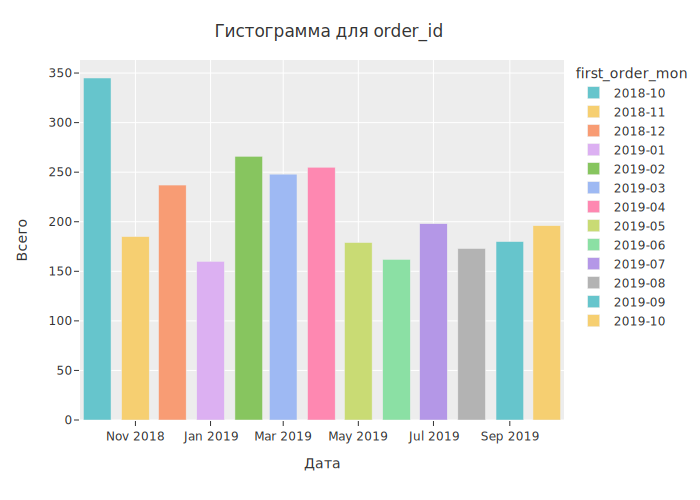

In [39]:
create_hist(cohort_grouped,'first_order_month','order_id')

Наибольшее число заказов можно увидеть в когорте октября 2018 года - 345 заказов. В Ноябре 2018 идет спад заказов до 185 заказов, Февраль, Март, Апрель, наиболее стабильные месяцы, от 248 до 266 заказы в эти месяцы, Наименьшая когорта в Январе 2019 года, тут лишь 160 заказов, но тут есть объяснение - посленовогодние дни.

Посмотрим теперь гистограмму по количеству уникальных новых пользователей:

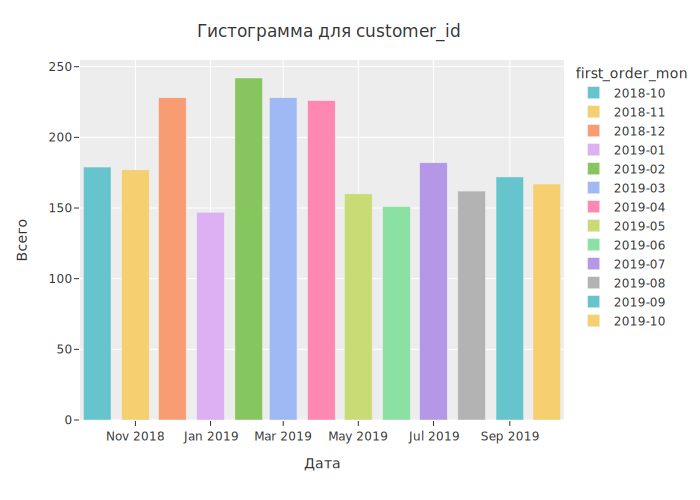

In [40]:
create_hist(cohort_grouped,'first_order_month','customer_id')

Тут если сравнивать динамику за год и взять в расчет октябрь 2018 и октябрь 2019, то разница составляет 12 пользователей в меньшую сторону. Наиболее успешные месяцы, это декабрь, когда люди выбирают подарки для Нового Года, а также, Февраль, Март, Апрель и здесь выделяются с положительной стороны с 242, 228 и с 226  уникальными пользователями соответственно. Январь, ожидаемо, самый слабый месяц со 147 уникальными пользователями.

Посмотрим теперь на диаграмму выручки:

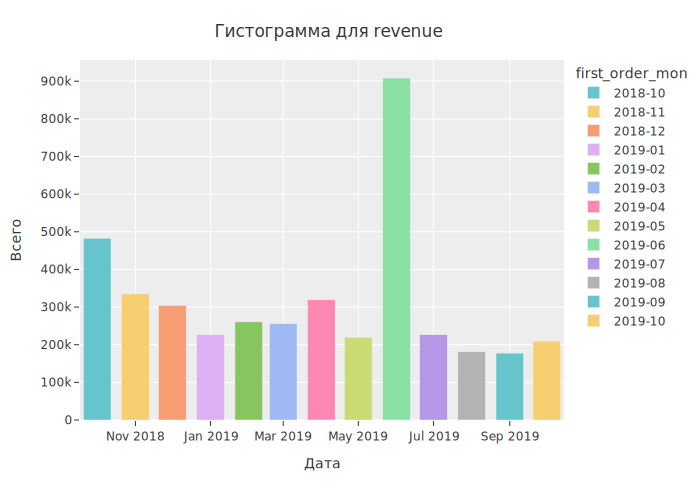

In [41]:
create_hist(cohort_grouped,'first_order_month','revenue')

Сразу в глаза когорта июня 2019 с общей выручкой 908,472 ден.ед.. Если не брать данный месяц, то можно выделить когорту октября 2018 с выручкой 482,762 ден.ед.. Что касаемо Октрбря 2019, то выручка, более чем в 2 раза меньше и составляет 209,419 ден. Ед. Динамика отрицательная по выручке среди новых пользователей. 

Посмотрим подробнее на когортку Июня 2019 по сумарной выручке с каждого заказа в порядке убывания:

In [42]:
data.query('first_order_month == "2019-06"').sort_values('revenue', ascending = False).head(3)

,date,customer_id,order_id,product,quantity,price,revenue,order_year,order_month,order_week,numb_week,order_day,order_hours,is_weekend,is_daytime,first_order_date,first_order_month
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.00,"675,000.00",2019,2019-06,Tuesday,25,2019-06-18,15,weekday,daytime,2019-06-18 15:00:00,2019-06
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.00,"49,432.00",2019,2019-06,Tuesday,24,2019-06-11,7,weekday,evening_time,2019-06-11 07:00:00,2019-06
4435,2019-06-04 07:00:00,940c175f-ea87-44e0-9e16-0a3d0a9abecd,71598,Скатерть круглая d-175 см 50% полиэстер 50% хл...,10,"1,140.00","11,400.00",2019,2019-06,Tuesday,23,2019-06-04,7,weekday,evening_time,2019-06-04 07:00:00,2019-06


Тут выделяется заказ 71743 с выручкой 675000 ден.ед.. Вантуз с деревяной ручкой, интересно кому понадобилось их столько, даже если брать в расчет, что это оптовый клиент. Нужно будет уточнить у менеджера состоялась лишь данная сделка по купле-продаже, а пока оставим.


**Вывод:** Количество заказов за год в Октрябре 2019, по сравнению с Октябрем 2018:
* Уменьшилось количество заказов в новых когортах на 149;
* Уменьшилось количество уникальных пользователей на 12 человек;
* Выручка уменьшилась на 273343 ден.ед..

### 3.4 Оценка изменений абсолютных показателей по месяцам

Посмотрим теперь на количество заказов по когортам в разрезе времени:

In [43]:
order_in_cohorts = data.pivot_table(index='first_order_month',
    columns='order_month',
    values='order_id',
    aggfunc='nunique')
order_in_cohorts

order_month,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10
first_order_month,,,,,,,,,,,,,
2018-10,238.00,20.00,44.00,8.00,28.00,8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11,NaN,184.00,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12,NaN,NaN,236.00,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01,NaN,NaN,NaN,158.00,3.00,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN
2019-02,NaN,NaN,NaN,NaN,257.00,3.00,6.00,NaN,NaN,NaN,NaN,NaN,NaN
2019-03,NaN,NaN,NaN,NaN,NaN,236.00,9.00,2.00,1.00,NaN,NaN,NaN,NaN
2019-04,NaN,NaN,NaN,NaN,NaN,NaN,249.00,5.00,NaN,1.00,NaN,NaN,NaN
2019-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173.00,3.00,NaN,2.00,NaN,1.00
2019-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.00,2.00,NaN,NaN,NaN


Создадим функцию для построения тепловой карты:

In [44]:
def create_heatmap(data):
    plt.figure(figsize=(15, 5))
    plt.title('Динамика изменения покозателей когорты по времени')
    sns.heatmap(data, annot=True, fmt=".1f", linewidths=.5, cmap = 'Pastel2')
    plt.xlabel('Месяц')
    plt.ylabel('Когорта')
    plt.show("svg")

Посмотрим на тепловую карту по количеству заказов в разрезе времени:

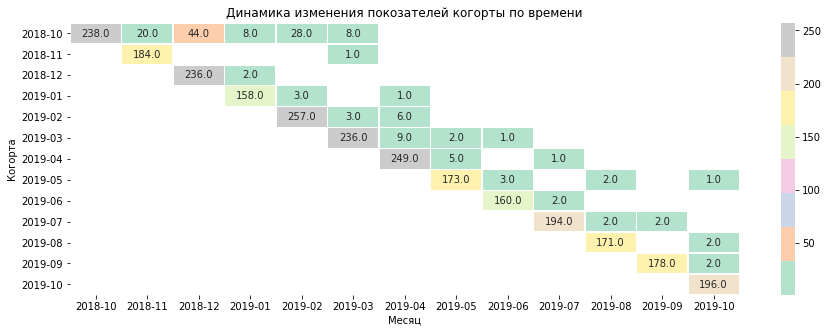

In [45]:
create_heatmap(order_in_cohorts)

На тепловой карте отчетливо видно, что лишь когорта 2018-10 имеет повторные покупки в большем количестве, что касаемо других когорт, они не особо жизнеспособны, повторных заказов практически нет совсем.

Теперь посмотрим на динамику когорт по пользователям в разрезе времени:

In [46]:
revenue_in_cohorts = data.pivot_table(index='first_order_month',
    columns='order_month',
    values='revenue',
    aggfunc='sum')
revenue_in_cohorts

order_month,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10
first_order_month,,,,,,,,,,,,,
2018-10,"350,748.00","24,981.00","44,097.00","9,449.00","44,806.00","8,681.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11,NaN,"334,791.00",NaN,NaN,NaN,194.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12,NaN,NaN,"300,291.00","4,109.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01,NaN,NaN,NaN,"221,157.00","4,685.00",NaN,698.00,NaN,NaN,NaN,NaN,NaN,NaN
2019-02,NaN,NaN,NaN,NaN,"256,568.00",260.00,"3,804.00",NaN,NaN,NaN,NaN,NaN,NaN
2019-03,NaN,NaN,NaN,NaN,NaN,"246,569.00","6,795.00","2,248.00",135.00,NaN,NaN,NaN,NaN
2019-04,NaN,NaN,NaN,NaN,NaN,NaN,"305,394.00","12,612.00",NaN,"1,274.00",NaN,NaN,NaN
2019-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"215,946.00","3,071.00",NaN,622.00,NaN,149.00
2019-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"907,113.00","1,359.00",NaN,NaN,NaN


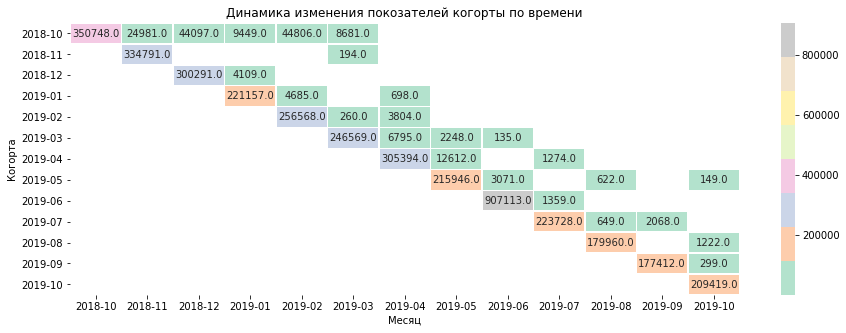

In [47]:
create_heatmap(revenue_in_cohorts)

Тут схожая картина, что неудивительно, лишь когорта 2018-10 приносит прибыль несколько месяцев подряд, остальные когорты приносят совсем уж малую прибыль со временем.

**Вывод:** Проделав данный этам работы было выявлено, что в разрезе когорт, в течении времени, практически нет повторых заказов, менеджерам стоит обратить внимание на данный немаловажный факт. Менеджерам следует выявить с чем это связано, вполне возможно, при содействии отдела маркетинга, путем анкетирования и выявления проблемых моментов, а также путем внедрения акций, можно было бы увеличить количество повторных заказов.

### 3.5 Изучение количества заказов, уникальных пользователей и суммы выручки по месяцам:

Посмотрим на количество заказов, уникальных пользователей, суммы выручки, вне когорт, а в общем, в динамике по месяцам заказа:

In [48]:
months_grouped = data.groupby('order_month').agg(
    {'order_id': 'nunique', 'customer_id': 'nunique', 'revenue': 'sum'}
).reset_index()
months_grouped

,order_month,order_id,customer_id,revenue
0,2018-10,238,179,"350,748.00"
1,2018-11,204,178,"359,772.00"
2,2018-12,280,230,"344,388.00"
3,2019-01,168,152,"234,715.00"
4,2019-02,288,246,"306,059.00"
5,2019-03,248,233,"255,704.00"
6,2019-04,265,236,"316,691.00"
7,2019-05,180,166,"230,806.00"
8,2019-06,164,154,"910,319.00"
9,2019-07,197,185,"226,361.00"


Также посмотрим визуально, в этот раз создадим функцию график другого вида:

In [49]:
def create_line(data,x,y):
    fig = px.line(data, x=x,  y = y, color_discrete_sequence= px.colors.qualitative.Pastel)
    fig.update_layout(title={'text': 'Гистограмма для '+ str(y), 'xanchor': 'center', 'y':0.95,
        'x':0.47}, xaxis_title='Дата', yaxis_title='Всего'
                   )
    fig.layout.template = 'ggplot2'
    fig.show("svg")

Посмотрим на динимаку количества заказов:

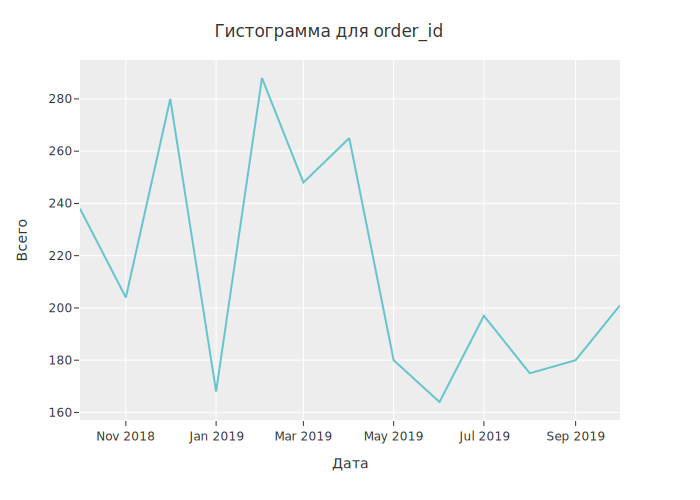

In [50]:
create_line(months_grouped,'order_month','order_id')

Картина немного похожа на вышеизложенные графики и это неспроста, так как количество повторных заказов минимально. Но изменения все-же есть. В первый месяц данных заказов 240, можно увидеть два пика, в Декабре и с Февраля по Апрель, после которое следует резкое пике, достигая своего минимума в Июне. После Сентября, в Октябре видится положительная динамика, но если судить в разрезе года, это все-же падение на 37 заказов.

Посмотрим теперь на количество уникальных клиентов:

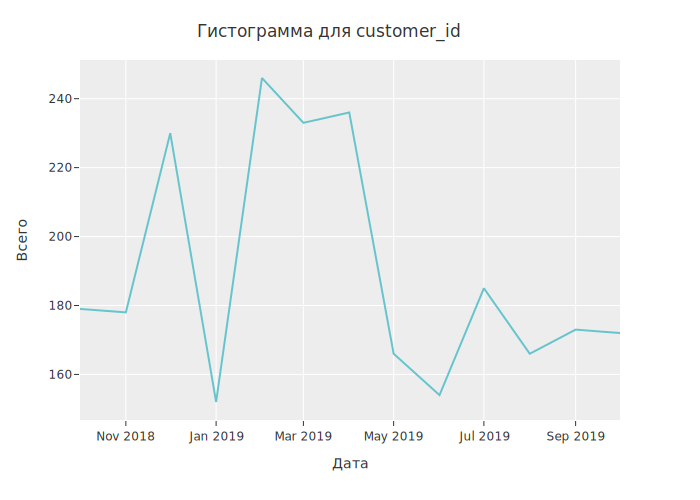

In [51]:
create_line(months_grouped,'order_month','customer_id')

Тут график практически повторяет график с уникальными заказами. Если смотреть по динамике в год , то видится спад , выраженный 7 клиентами.

Посмотрим также на выручку по месяцам:

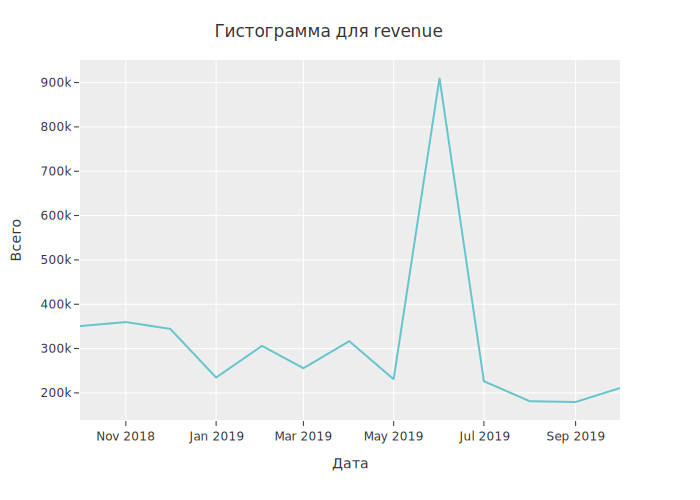

In [52]:
create_line(months_grouped,'order_month','revenue')

И тут можно заметить, что изначально, выручка была 350748 ден.ед., и если смотреть на годовую динамику, с моментам сбора первых предоставленных данных, то выручка показывает отрицательную динамику. Тут, напротив, можно увидеть резкий пик в Июне, когда в вышеизложенных графиках был спад, то по выручке это рекорд, выраженный - 910319 ден.ед., как выше было замечено это популярные вантузы. Выручка очень важный фактор, за ним следует смотреть внимательнее.

**Вывод:** С Февраля по Апрель, самый пик заказов и посетилей, в то же время по выручке не видно особой корреляции с этим фактом. Менеджерам стоит присмотреться к ассортементу своего магазина, ибо наблюдается картина, когда растет количество заказов и покупателей, выручка же непропорцианальна данному явлению. 

In [53]:
orders = data.groupby('order_id').agg({'product':'nunique', 'quantity':'sum'})

In [54]:
orders

,product,quantity
order_id,,
12624,2,2
13547,3,3
14480,3,3
14481,4,4
14482,2,2
...,...,...
73155,1,1
73156,1,1
73158,1,1


## Этап 4. Сегментация товаров

### 4.1 Выделение товарных категорий

Создадим переменную с леммами столбца с товарами:

In [55]:
m = Mystem()
lemmas = m.lemmatize(' '.join(data['product']))

Посмотрим какие леммы встречаются, чтоб в дальнейшем разделить на категории:

In [56]:
print(Counter(lemmas))

Counter({' ': 35555, 'см': 2122, '-': 1958, ', ': 1857, 'для': 1010, 'пеларгония': 823, 'рассада': 595, ',': 572, 'в': 548, 'л': 492, 'зональный': 487, '. ': 484, 'd': 452, 'диам': 452, '12': 447, 'с': 401, 'кассета': 399, '5': 390, 'шт': 371, ' (': 367, '0': 365, 'сорт': 360, 'тележка': 346, 'махровый': 342, 'черенок': 336, 'укоренять': 334, '9': 332, 'белый': 320, ') ': 315, 'сумка': 314, 'белье': 310, 'красный': 305, 'объем': 296, 'сушилка': 278, 'горшок': 275, '2': 261, 'по': 259, 'розебудный': 246, 'цветок': 245, '6': 239, 'доска': 235, 'кухня': 225, 'зелень': 220, '10': 209, 'Gimi': 204, 'синий': 201, 'розовый': 196, '/': 193, 'гладильный': 192, '7': 190, 'однолетний': 187, '4': 186, 'полумахровый': 185, 'петуния': 174, 'россия': 171, 'муляж': 170, 'томат': 170, '30': 169, 'помидор': 162, 'кг': 161, '№': 160, 'ника': 156, 'м': 154, '1': 152, 'и': 152, 'h': 148, '20': 142, 'хозяйственный': 137, '*': 133, '25': 132, 'х': 131, 'сиреневый': 131, '3': 127, 'D12': 127, 'черный': 125, '

Создадим категориальные переменны с входящими в них товарами:

In [57]:
# 1 Товары для цветов
plants = ['пеларгония','бархатцы','сельдерей','суккулент','рассада','клен','бакоп','юкка','шеффлер', 'лузеан','растение', 
          'алоэ','радермахер','хризолидокарпус', 'лутесценс','томата','пеларгония', 'роза','петуния','герань', 'цветок',
          'однолетнее','флокс','цикламен', 'примула','калибрахоа','фуксия','вербена','пуансеттия','фиалка','дыня',
          'комнатное','базилик','бегония','бальзамин','бакопа','космея','мята','антуриум','огурец','хризантема',
          'эвкалипт','декабрист','томат','гвоздика','арбуз','петрушка','цинния', 'патиссон','алиссум','азалия','тимьян',
          'лобелия', 'исскуственная', 'капуста', 'газания', 'циперус','виола', 'хлорофитум', 'лаванда', 'розмарин', 
          'мимоза', 'мединилла', 'тагетис', 'земляника', 'астра', ' зверобой', 'настурция', 'папоротник','календула',
          'каланхое', 'тыква', 'гербера','цветущее', 'афеляндра', 'нивянник', 'вербейник', 'гардения','d', 'гортензия',
          'калатея', 'алое', 'кореопсис', 'укроп', 'вигна', 'скиммия', 'колеус', 'душица', 'фатсия', 'лантана', 'кабачок',
          'салат', 'осина', 'целозия', 'портулак', 'крассула', 'аргирантерум', 'хоста', 'цинерария', 'монарда',
          'баклажан', 'вероника', 'сальвия', 'кориандр', 'лен', 'цитрофортунелла', 'пахира', 'фаленопсис', 
          'искусственная', 'эхеверия', 'клубника', 'многолетнее', 'кофе', 'седум', 'табак', 'спатифиллум', 
          'дендориум', 'калла', 'лавр', 'мирт','львиный', 'дендробиум', 'цветочная', 'искусственный','кипарисовик',
          'колокольчик','декоративная' ]

# 2 хозтовары
household_goods = ['сумка','свереть','маска','штангенциркуль','концентрат','фиксатор','посудомоечный','ополаскиватель', 'бальзам',
                   'ролик','пакет','скребок','полк','антижир','средство','губка','линейка','ручка','пьезозажигалка',
                   'тряпка','гвоздик','таз', 'кашпо', 'сверло', 'вантуз', 'швабра','ведро','щетка-утюжок','жестяная', 
                   'пружина','зубная', 'шнур', 'петля', 'ящик', 'коробка',  'бельевые','новогоднее', 'кондиционер',
                   'корыто',  'веник','крем','мыло', 'дозатор', 'шило', 'термометр',   'тряпкодержатель', 'совок',
                   'бензин','отбеливатель', 'мешок','кипятильник',  'шпагат',   'вакумный', 'фал', 'корзинка', 'ваза',
                   'подарочный', 'ткань','автоматическая', 'пылесос','щетка-сметка', 'окномойка','щётка','щетка','паста',
                   'салфетка','насадка','cредство','перчатки',  'измерительный','сверло-фреза','крепеж',
                   'многофункциональный','перчатка', 'шпингалет','сварка','петля-стрела','крючок','камнеломка',
                   'стяжка', 'стяжки']

# 3 товары для ванной комнаты
bathroom = ['ванна','уголок', 'прищепок','подголовник', 'штора', 'сидение','халат', 'махровый', 'полотенце', 
            'махровое','вешалка-сушилка', 'карниз','настенная','сушилка','фен','штанга','решетка','ёрш',
            'ерш','ковш','пробка','комплект','контейнер', 'сиденье','корзина','бак','стакан','держатель','контейнер',
            'ковры','сетка']

# 4 Товары для хранения вещей
goods_for_storage  = ['полки','чехол','ключница', 'обувница', 'этажерка','полка', 'обувница-3',  'складной',
                      'вешалка','вешалки', 'вешалка-плечики', 'вешалка-стойка', 'комод','фоторамка', 'стеллаж', 
                      'светильник','подставка', 'плечики','одежда']

# 5 Хозяйственный инвентарь
household_inventory = ['лестница-стремянка','тележка','стремянка', 'лестница', 'стремянки', 'урна-пепельница',
                       'муссорный', 'урна', 'стремянка-табурет', 'почтовый','сумка-тележка']

# 6 Товары для Кухни
kitchen = ['орехоколка','фужер','ножеточка','муляж','тарелка', 'сахарница','салатник','кружка','банка','сковорода', 'кастрюля',
           'ложка','вилка', 'кухонное', 'термокружка', 'термос', 'нож',   'кувшин', 'чайный', 'миска', 'овсянница',
           'терка', 'измельчитель','выпечка','кухонный', 'чайная',  'разделочная', 'блюдце', 'рыбочистка', 'термостакан',
           'бидон', 'половник', 'толкушка', 'сервировочная', 'лопатка', 'столовый', 'сахарница', 'сотейник', 'бульонница',
           'венчик', 'скалка', 'сотейник', 'тортница','пресс', 'tepмокружка', 'хлебница',  'блюдо', 'чайник', 'модульная',
           'отделитель','весы', 'миксер', 'овощеварка', 'соковарка','котел', 'мантоварка-пароварка', 'мантоварка',
           'электроштопор',  'овощечистка','соковыжималка','термокружок','мусорный','кисточка','крышка','просеиватель',
           'лоток','емкость']
# 7 Текстиль
textile = ['покрывало','наволочка', 'противень','простыня', 'одеяло',  'простынь', 'подушка',  'наматрасник',
           'двуспальное',  'наматрацник-чехол', 'наматрацник','белье', 'пододеяльник','наматрицник-чехол', 
           'кофр','плед', 'ковер','кекс','бокал', 'ковёр', 'коврик','скатерть','утюг', 'подкладка', 'подрукавник', 'рукав', 
           'гладильная','покрытие','посуда','доска']

Создадим функцию для определения категории товара:

In [58]:
def category_group(product_category):
        lemma_for_group = m.lemmatize(product_category)
        for name in  lemma_for_group: 
            if name in plants:
                return 'Растения'
            if name in household_goods:
                return 'Хозтовары'
            if name in bathroom:
                return 'Товары для ванной комнаты'
            if name in goods_for_storage:
                return 'Товары для хранения вещей'
            if name in household_inventory:
                return 'Хозяйственный инвентарь'
            if name in kitchen:
                return 'Товары для кухни'
            if name in textile:
                return 'Текстиль'           

Применим функцию для категоризации товарых позиций:

In [59]:
data['product_category'] = data['product'].apply(category_group)

Посмотрим, есть ли не определившиеся позиции:

In [60]:
data[data['product_category'].isnull()]

,date,customer_id,order_id,product,quantity,price,revenue,order_year,order_month,order_week,numb_week,order_day,order_hours,is_weekend,is_daytime,first_order_date,first_order_month,product_category
976,2018-11-25 14:00:00,52aff75c-a972-4c25-bad5-dfe6a48cd981,14512,"Космея Очаровашка 0,05 г 4660010779578",1,22.00,22.00,2018,2018-11,Sunday,47,2018-11-25,14,weekend,daytime,2018-11-25 14:00:00,2018-11,None
977,2018-11-25 14:00:00,52aff75c-a972-4c25-bad5-dfe6a48cd981,14512,Морковь Детская сладость 2 г 4660010775921,1,10.00,10.00,2018,2018-11,Sunday,47,2018-11-25,14,weekend,daytime,2018-11-25 14:00:00,2018-11,None
1071,2018-12-03 11:00:00,2c8b9386-2e8c-4ee9-8aa4-2b4875b68578,14514,"Годеция Рембранд 0,1 г 4650091480128",2,11.00,22.00,2018,2018-12,Monday,49,2018-12-03,11,weekday,daytime,2018-12-03 11:00:00,2018-12,None
1075,2018-12-03 11:00:00,2c8b9386-2e8c-4ee9-8aa4-2b4875b68578,14514,"Космея Клюквенный клик 0,1 г 4660010770421",1,22.00,22.00,2018,2018-12,Monday,49,2018-12-03,11,weekday,daytime,2018-12-03 11:00:00,2018-12,None
1076,2018-12-03 11:00:00,2c8b9386-2e8c-4ee9-8aa4-2b4875b68578,14514,"Космея Кэнди страйп 0,3 г 4650091480272",1,11.00,11.00,2018,2018-12,Monday,49,2018-12-03,11,weekday,daytime,2018-12-03 11:00:00,2018-12,None
1077,2018-12-03 11:00:00,2c8b9386-2e8c-4ee9-8aa4-2b4875b68578,14514,"Лапчатка Огненное пламя 0,02 г 4650091480616",1,19.00,19.00,2018,2018-12,Monday,49,2018-12-03,11,weekday,daytime,2018-12-03 11:00:00,2018-12,None
1086,2018-12-03 11:00:00,2c8b9386-2e8c-4ee9-8aa4-2b4875b68578,14514,"Эшшольция Карминный король 0,5 г 4660010770193",2,10.00,20.00,2018,2018-12,Monday,49,2018-12-03,11,weekday,daytime,2018-12-03 11:00:00,2018-12,None
1179,2018-12-12 08:00:00,d1a94032-a484-4d20-bbaf-5409db52b69f,69313,Гиностемма укорененный черенок 1 шт,1,44.00,44.00,2018,2018-12,Wednesday,50,2018-12-12,8,weekday,evening_time,2018-12-12 08:00:00,2018-12,None
1182,2018-12-12 14:00:00,c5a58955-4352-4d1c-bb4e-16ca0a94bc6f,14516,Ель канадская Коника ртк 303 горшок 9 л Нидерл...,1,232.00,232.00,2018,2018-12,Wednesday,50,2018-12-12,14,weekday,daytime,2018-12-12 14:00:00,2018-12,None
1224,2018-12-16 18:00:00,db3795d2-a180-4269-81b6-f35848d754a1,69390,Новогоднее дерево Ель канадская Коника в красн...,1,"1,237.00","1,237.00",2018,2018-12,Sunday,50,2018-12-16,18,weekend,evening_time,2018-12-16 18:00:00,2018-12,None


Так как все значения относятся к цветам, заменим их вручную:

In [61]:
data.loc[data['product_category'].isnull(), 'product_category'] = 'Растения'

In [62]:
data['product_category'].value_counts()

Растения                     2542
Хозтовары                     590
Товары для ванной комнаты     505
Товары для кухни              483
Текстиль                      346
Товары для хранения вещей     201
Хозяйственный инвентарь       149
Name: product_category, dtype: int64

Посмотрим на полученный резульат:

In [63]:
data.sample(5)

,date,customer_id,order_id,product,quantity,price,revenue,order_year,order_month,order_week,numb_week,order_day,order_hours,is_weekend,is_daytime,first_order_date,first_order_month,product_category
6233,2019-09-01 20:00:00,92d801b9-5b5d-43df-ba12-01162040c8da,72471,Покрывало стеганый KARNA 200х220 см 9234567049108,1,"1,319.00","1,319.00",2019,2019-09,Sunday,35,2019-09-01,20,weekend,evening_time,2019-09-01 20:00:00,2019-09,Текстиль
5917,2019-07-21 15:00:00,9aa18293-3e06-4eb4-9661-a4e845e6ad6d,72053,Штора для ванной комнаты Cannetto 240х200 см к...,1,"1,199.00","1,199.00",2019,2019-07,Sunday,29,2019-07-21,15,weekend,daytime,2019-07-21 15:00:00,2019-07,Товары для ванной комнаты
1479,2019-01-11 06:00:00,ccec2b0e-ea0a-4f0d-a829-88f7adbc9825,69640,Сумка-тележка 2-х колесная Gimi Argo синяя,1,"1,049.00","1,049.00",2019,2019-01,Friday,2,2019-01-11,6,weekday,evening_time,2019-01-11 06:00:00,2019-01,Хозтовары
3793,2019-05-14 19:00:00,bea7a833-2074-42db-bc49-4457abd3c930,14777,Однолетнее растение Львиный зев в кассете по 4...,2,82.00,164.00,2019,2019-05,Tuesday,20,2019-05-14,19,weekday,evening_time,2019-05-14 19:00:00,2019-05,Растения
1838,2019-02-15 14:00:00,11f83991-ae0e-40bb-83ff-497f24103e75,70278,Примула желтая с оранжевым в горшке d-10 см,1,127.00,127.00,2019,2019-02,Friday,7,2019-02-15,14,weekday,daytime,2019-02-15 14:00:00,2019-02,Растения


**Вывод:** С помощью лемматизации успешно разделили товарные позиции на категории.

### 4.2 Изучение продаж в товарных категориях

Вначале посмотрим сколько всего продано товаров в каждой позиции и на какую сумму:

In [64]:
category_all =data.groupby('product_category').agg({'quantity': 'sum', 'revenue':'sum'}).sort_values('quantity', ascending = False).reset_index()
category_all

,product_category,quantity,revenue
0,Растения,4371,"516,321.00"
1,Хозтовары,3784,"1,590,652.00"
2,Товары для кухни,2586,"351,372.00"
3,Товары для хранения вещей,1150,"274,251.00"
4,Товары для ванной комнаты,851,"523,666.00"
5,Текстиль,602,"589,573.00"
6,Хозяйственный инвентарь,212,"261,528.00"


Посмотрим также визуально:

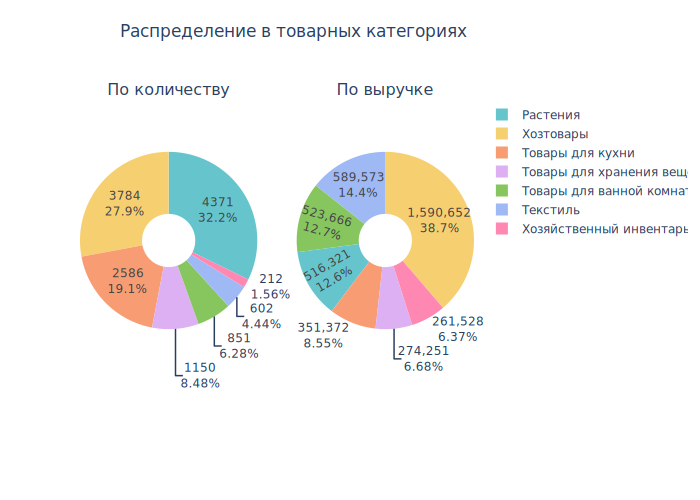

In [65]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],subplot_titles=("По количеству", "По выручке"))


fig.add_trace(go.Pie(labels=category_all['product_category'], values=category_all['quantity'],hole=.3, textinfo='percent+value',
     name="Количество", marker_colors=px.colors.qualitative.Pastel),
     row=1, col=1)

fig.add_trace(go.Pie(
     labels=category_all['product_category'], values=category_all['revenue'],hole=.3, textinfo='percent+value',
     name="Выручка"),
     row=1, col=2)
fig.update_layout(title={'text': "Распределение в товарных категориях", 'xanchor': 'center', 'y':0.95,
        'x':0.42} )
fig.show("svg")

**Вывод:** Больше всего за весь периодов в количественном выражении было продано в категории "Растения" - 4371 ед., следом идут хозтовары с 3784 товарными единами, замыкает тройку категоря "Товары для кухни". Предпоследняя позиция в категории "Текстиль" - 602 товарных единицы и последняя позиция за категорией "Хозяйственный инвентарь" - 212 проданных штук. 

По выручке картина отличается. Первое место за категорией - "Хозтовары" с доходом 1,590,652 ден.ед., второе место у Текстиля - 589,573 ден.ед., третье место за категорией "Товары для ванной комнаты" - 523,666 ден.ед.. Предпоследнее место у категории "Товары для хранения вещей" - 589,573 ден.ед., последнее место по доходности у категории "Хозяйственный инвентарь" -  261,528 ден.ед..

### 4.3 Изучение сезонности товаров

#### 4.3.1 Месячная сезонность

Создадим сводную таблицу с месяцами и товарными категориями по количеству проданного товара:

In [66]:
sales_in_category = data.pivot_table(index = 'order_month', columns = 'product_category', values = 'quantity', aggfunc = 'sum').reset_index()
sales_in_category

product_category,order_month,Растения,Текстиль,Товары для ванной комнаты,Товары для кухни,Товары для хранения вещей,Хозтовары,Хозяйственный инвентарь
0,2018-10,215,59,113,242,111,798,15
1,2018-11,150,82,73,620,102,195,18
2,2018-12,92,69,57,258,57,378,68
3,2019-01,155,59,34,126,101,151,7
4,2019-02,352,38,115,238,53,135,10
5,2019-03,476,31,61,187,160,128,9
6,2019-04,969,39,91,61,65,221,11
7,2019-05,907,11,50,330,8,185,9
8,2019-06,299,67,45,74,384,1078,12
9,2019-07,251,48,47,85,30,84,10


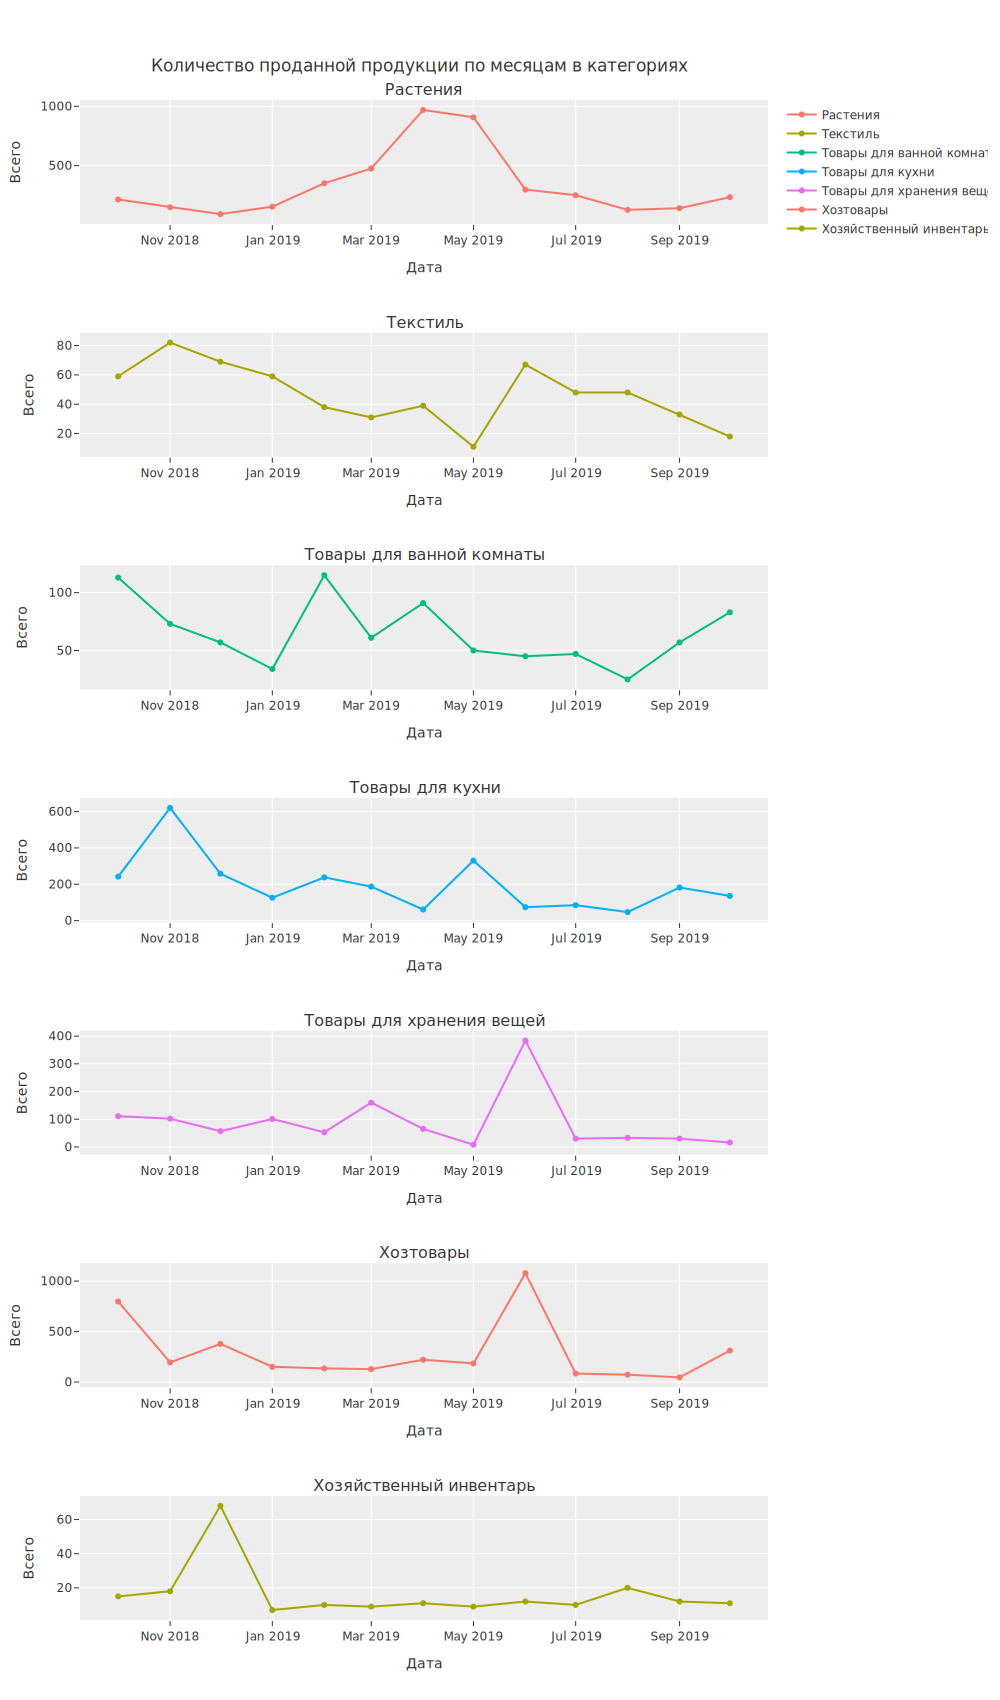

In [67]:
fig = make_subplots(rows=7, cols=1, subplot_titles=(sales_in_category.drop('order_month',axis = 1).columns))

fig.append_trace(go.Scatter(
    x=sales_in_category['order_month'],
    y=sales_in_category['Растения'],
name="Растения"), row=1, col=1)

fig.append_trace(go.Scatter(
    x=sales_in_category['order_month'],
    y=sales_in_category['Текстиль'],
name="Текстиль"), row=2, col=1)

fig.append_trace(go.Scatter(
    x=sales_in_category['order_month'],
    y=sales_in_category['Товары для ванной комнаты'],
name="Товары для ванной комнаты"), row=3, col=1)

fig.append_trace(go.Scatter(
    x=sales_in_category['order_month'],
    y=sales_in_category['Товары для кухни'],
name="Товары для кухни"), row=4, col=1)

fig.append_trace(go.Scatter(
    x=sales_in_category['order_month'],
    y=sales_in_category['Товары для хранения вещей'],
name="Товары для хранения вещей"), row=5, col=1)

fig.append_trace(go.Scatter(
    x=sales_in_category['order_month'],
    y=sales_in_category['Хозтовары'],
name="Хозтовары"), row=6, col=1)

fig.append_trace(go.Scatter(
    x=sales_in_category['order_month'],
    y=sales_in_category['Хозяйственный инвентарь'],
name="Хозяйственный инвентарь"), row=7, col=1)

fig.update_layout(height = 1700,
                  width = 1000, title={'text': "Количество проданной продукции по месяцам в категориях", 'xanchor': 'center', 'y':0.965,
        'x':0.42})
fig.update_xaxes(title_text="Дата")
fig.update_yaxes(title_text="Всего")
fig.layout.template = 'ggplot2'
fig.show("svg")

**Проанализировав табличные и визуальные данные можно сделать следующие выводы:**
* У растений явно виден пик спроса с Февраля по Июнь, достигая своего апогея в апреле - 969 единиц. ;
* У текстиля виден пик в ноябре 2018 года - 82 единицы, потом идет стабильный спад и затем лишь в Июне рост до 67 - единиц;
* Для товаров ванной комнаты - Октябрь 2018 года и Февраль 2019 года наилучшие месяцы, со 113 и 115 проданными единицами, также с Сентября виден рост;
* Заметный спрос на кухонные принадлежности в Ноябре 2018 года - 620 реализованных продаж, затем видно  снижение количества проданной продукции в данной категории, лишь в Мае видится рост до 330 единиц. Летом данная категория не очень пользуется спросом; (Менеджерам стоит обратить внимание на данное явление и на ассортимент товаров для кухни);
* Для категории "Товары для хранения вещей" виден заметный пик в июне, затем резкий спад, быть может Магазин выводит данную категорию товаров из ассортимента, если же нет, то Менеджерам стоит обратить внимание на малые продажи в данной категории;
* Для хозтоваров лучшие месяцы - Октяьрь 2018 года и Июнь 2019 года, но в Июне имеется продажа одним заказом 1000 вантусов, если брать в расчет, что данный заказ неошибочный, по сравнению с Октябрем прошло года, в 2019 году, замтное снижение спроса на данную категорию;
* Хозяйственный инвентарь хорошо продавался лишь в Декабре 2018 года, остальные месяцы продажи минимальные.

#### 4.3.2 Недельная сезонность

Посмотрим как меняется недельная сезонность:

In [68]:
sales_in_category_week = data.pivot_table(index = ['order_year','numb_week'], columns = 'product_category', values = 'quantity', aggfunc = 'sum').reset_index()
sales_in_category_week.head(5)

product_category,order_year,numb_week,Растения,Текстиль,Товары для ванной комнаты,Товары для кухни,Товары для хранения вещей,Хозтовары,Хозяйственный инвентарь
0,2018,40,41.00,15.00,36.00,75.00,13.00,140.00,2.00
1,2018,41,72.00,16.00,29.00,75.00,41.00,171.00,3.00
2,2018,42,22.00,7.00,26.00,49.00,10.00,434.00,4.00
3,2018,43,62.00,12.00,15.00,37.00,24.00,39.00,4.00
4,2018,44,29.00,19.00,9.00,373.00,25.00,34.00,4.00


Создадим столбец, где объединим порядковый номер недели и год:

In [69]:
sales_in_category_week['year_weeks'] =sales_in_category_week['numb_week'].astype(str) + str('-') + sales_in_category_week['order_year'].astype(str) 

Посмотрим на конечный результат:

In [70]:
sales_in_category_week.head(2)

product_category,order_year,numb_week,Растения,Текстиль,Товары для ванной комнаты,Товары для кухни,Товары для хранения вещей,Хозтовары,Хозяйственный инвентарь,year_weeks
0,2018,40,41.00,15.00,36.00,75.00,13.00,140.00,2.00,40-2018
1,2018,41,72.00,16.00,29.00,75.00,41.00,171.00,3.00,41-2018


Посмотрим на все визуально:

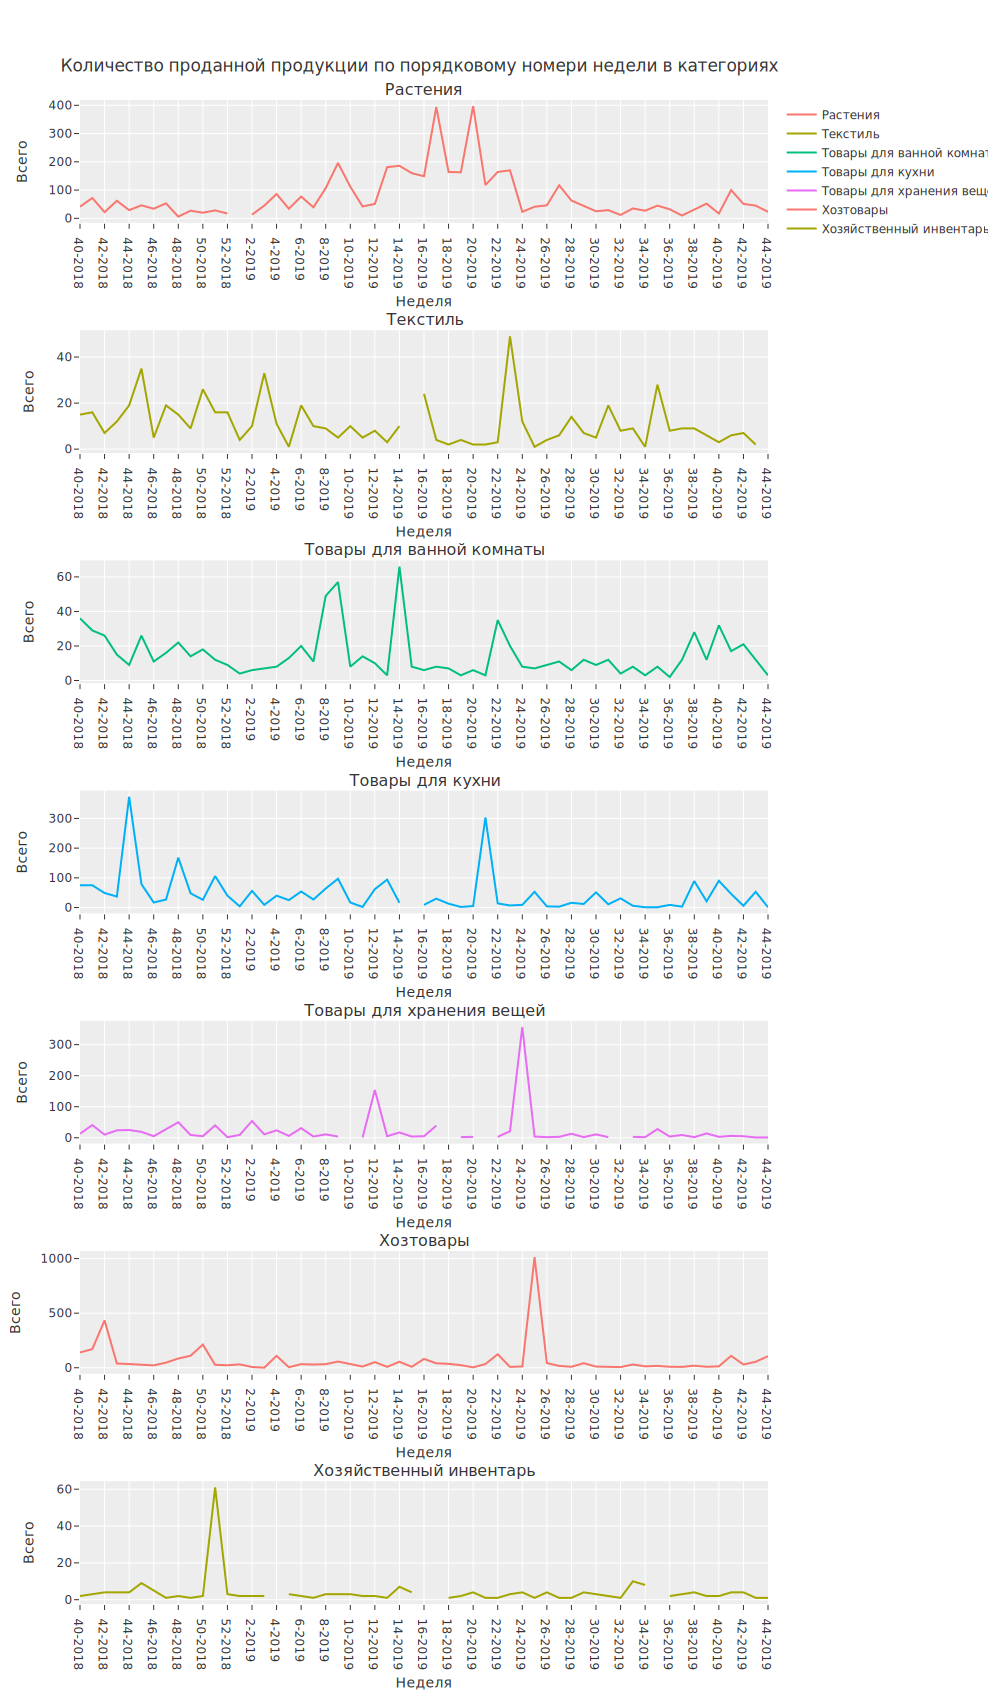

In [71]:
fig = make_subplots(rows=7, cols=1, subplot_titles=(sales_in_category_week.drop(['order_year','numb_week'],axis = 1).columns))


fig.append_trace(go.Scatter(
    x=sales_in_category_week['year_weeks'],
    y=sales_in_category_week['Растения'],
    name="Растения"), row=1, col=1)

fig.append_trace(go.Scatter(
    x=sales_in_category_week['year_weeks'],
    y=sales_in_category_week['Текстиль'],
    marker_color=sales_in_category_week['order_year'],
name="Текстиль"), row=2, col=1)

fig.append_trace(go.Scatter(
    x=sales_in_category_week['year_weeks'],
    y=sales_in_category_week['Товары для ванной комнаты'],
name="Товары для ванной комнаты"), row=3, col=1)

fig.append_trace(go.Scatter(
    x=sales_in_category_week['year_weeks'],
    y=sales_in_category_week['Товары для кухни'],
name="Товары для кухни"), row=4, col=1)

fig.append_trace(go.Scatter(
    x=sales_in_category_week['year_weeks'],
    y=sales_in_category_week['Товары для хранения вещей'],
name="Товары для хранения вещей"), row=5, col=1)

fig.append_trace(go.Scatter(
    x=sales_in_category_week['year_weeks'],
    y=sales_in_category_week['Хозтовары'],
name="Хозтовары"), row=6, col=1)

fig.append_trace(go.Scatter(
    x=sales_in_category_week['year_weeks'],
    y=sales_in_category_week['Хозяйственный инвентарь'],
name="Хозяйственный инвентарь"), row=7, col=1)

fig.update_layout(height = 1700,
                  width = 1000, title={'text': "Количество проданной продукции по порядковому номери недели в категориях", 'xanchor': 'center', 'y':0.965,
        'x':0.42})
fig.update_xaxes(title_text="Неделя")
fig.update_yaxes(title_text="Всего")
fig.layout.template = 'ggplot2'
fig.show("svg")

**Проанализировав табличные и визуальные данные можно сделать следующие выводы:**
* В первую неделю года у категории "Растения" нет продаж совсем, с 13 по 23 самое сезонное время, которое достигает пика, на 17 и 20 неделе, с 394 и 397 проданными позициями;
* У текстиля на 15 и на 44 неделе нет продаж, зато наблюдяается 3 пика, в 45 неделе 2018 года - 35 единиц, 3 неделя - 33 единиц и достигаем своего апогея данная категория товаров  на 23 неделе - 49 единиц;
* Для товаров ванной комнаты пики в 8,9 и 14 неделю 2019 года, 49,57 и 67 проданных товарных единиц соответственно;
* Для категории "Товары для кухни" имеется 2 пика 44 неделя 2018 года с 373 проданными единицами и 21 неделя 2019 года с 303 проданными позициями, послее нет идет резкое пике, в 15,неделю  2019 года нет продаж вообще;
* Для категории "Товары для хранения вещей" 2 роста, 12 неделя 2019 года с0 154 продажами и 24 неделя 2019 года с 357 продажами, также есть недели, когда не было продаж совсем - 10,18,21,32 недели 2019 года;
* Хозтовары имеют пики в 42 неделю 2018 года и 25 неделя 2019 года, но тут нужно учитывать, что на 25 неделе были те самые вантусы;
* Хозяйственный инвентарь имеет пике в прендновогодюю 51 неделю в 2018 году, нет продаж в 4,16,17,35 недели 2019 года.

### 4.4 Топ-5 самых продаваемых товаров по категориям

Посмотрим какие 5 позиций в каждой категории лидируют, для удобства создадим функцию:

In [72]:
def create_top_5(data,slices,groupby,value):
    """Данная функция создает агрегированную таблицу и гистограмму для топ-5 товаров категории
    
    На вход получает датасет и столбцы необходимые для среза,на выходе получает агрегировонную таблицу и гистограмму"""
    top5 = data[data['product_category'] == slices].groupby(groupby)[value].sum().sort_values(ascending = False).to_frame().head(5).reset_index()
    fig = go.Figure()
    pull = [0]*len(top5['quantity'])
    pull[top5['quantity'].tolist().index(top5['quantity'].max())] = 0.2
    fig.add_trace(go.Pie(values=top5['quantity'], labels=top5['product'],hole=0.9,pull=pull, textinfo='percent+value', marker_colors=px.colors.qualitative.Pastel))
    fig.update_layout(title="Топ-5 позиций в категории",title_x = 0.5,legend_orientation="h",
    annotations=[dict(text=str(slices), x=0.5, y=0.5, font_size=14, showarrow=False)])
    fig.show("svg")
    return top5

Посмотрим на топ-5 для категории "Растения":

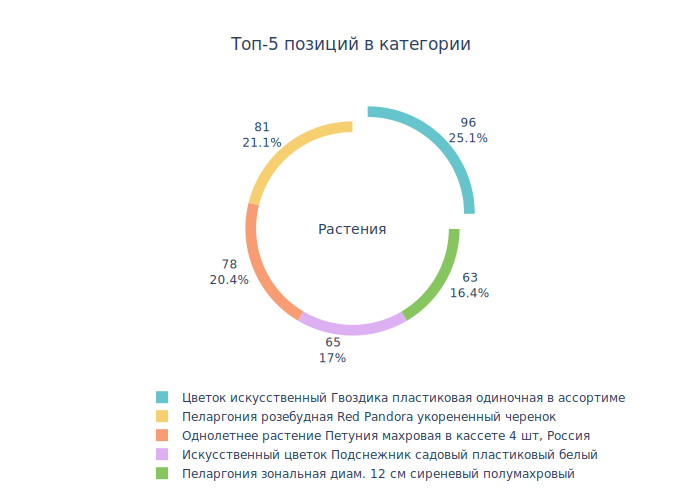

,product,quantity
0,Цветок искусственный Гвоздика пластиковая один...,96
1,Пеларгония розебудная Red Pandora укорененный ...,81
2,Однолетнее растение Петуния махровая в кассете...,78
3,Искусственный цветок Подснежник садовый пласти...,65
4,Пеларгония зональная диам. 12 см сиреневый пол...,63


In [73]:
create_top_5(data,"Растения","product","quantity")

Лидирующую позицию занимает искуственная Гвоздика с 96 продажами, следом идет Пеларгония розебудная с 81 продажей, 3 позиция у однолетнего растения Петуния - 78 продаж. 4 и 5 место у Искусственный цветок Подснежник, Пеларгония зональная диам с 65 и 63 продажами соответственно.

Посмотрим на следующую категорию товаров- "Текстиль":

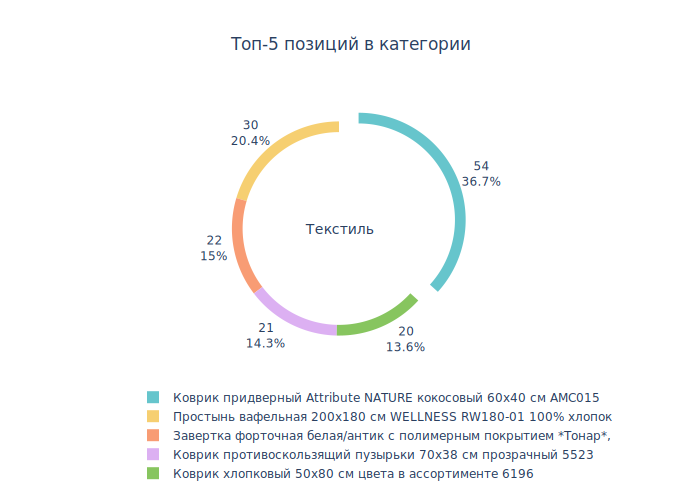

,product,quantity
0,Коврик придверный Attribute NATURE кокосовый 6...,54
1,Простынь вафельная 200х180 см WELLNESS RW180-0...,30
2,Завертка форточная белая/антик с полимерным по...,22
3,Коврик противоскользящий пузырьки 70х38 см про...,21
4,Коврик хлопковый 50х80 см цвета в ассортименте...,20


In [74]:
create_top_5(data,"Текстиль","product","quantity")

Первое место у коврика Коврик придверный Attribute с 54 продажами, второе у простыни вафельной - 30 продаж, замыкает тройку завертка форточкая с 22 продажами. 4 и 5 место у ковриков противоскользящего -21 продажа и хлопкового - 20 продаж.

Следующая категория "Товары для ванной комнаты":

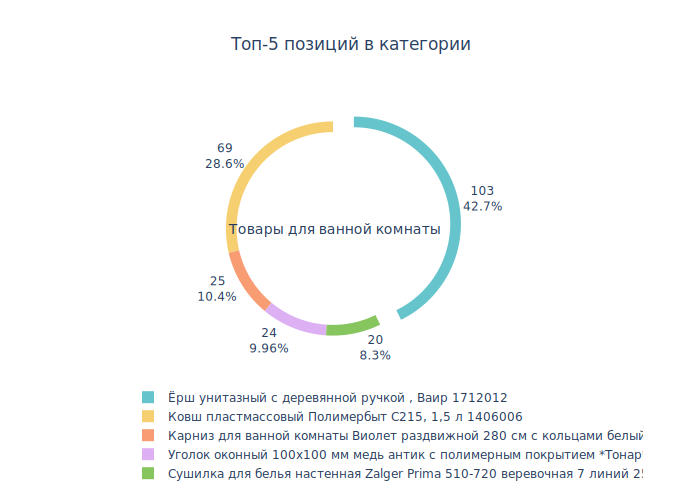

,product,quantity
0,"Ёрш унитазный с деревянной ручкой , Ваир 1712012",103
1,"Ковш пластмассовый Полимербыт С215, 1,5 л 1406006",69
2,Карниз для ванной комнаты Виолет раздвижной 28...,25
3,Уголок оконный 100х100 мм медь антик с полимер...,24
4,Сушилка для белья настенная Zalger Prima 510-7...,20


In [75]:
create_top_5(data,"Товары для ванной комнаты","product","quantity")

Первое место у Ерша - 103 продажи, следом идут ковш пластмассовый Полимербыт с 69 продажами и карнид для ванной комнаты с 25 продажами. 4 место у уголка  - 24 продажи и замыкает пятерку сушилка для белья - 20 проданных штук.

Следующая категория "Товары для кухни":

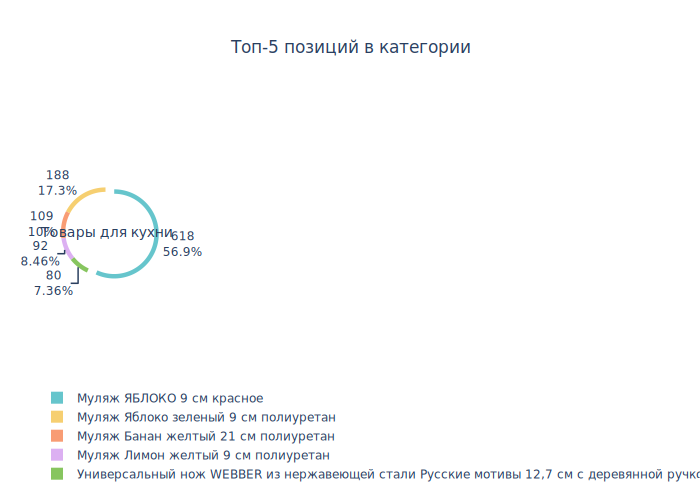

,product,quantity
0,Муляж ЯБЛОКО 9 см красное,618
1,Муляж Яблоко зеленый 9 см полиуретан,188
2,Муляж Банан желтый 21 см полиуретан,109
3,Муляж Лимон желтый 9 см полиуретан,92
4,Универсальный нож WEBBER из нержавеющей стали ...,80


In [76]:
create_top_5(data,"Товары для кухни","product","quantity")

Лидирует позиция - Муляж ЯБЛОКО 9 см красное с 618 продажами, следом идет Муляж Яблоко зеленый 9 см полиуретан с 188 продажами, замыкает тройку Муляж Банан желтый 21 см полиуретан - 109 проданных штук. 4 место у Муляж Лимон желтый 9 см полиуретан - 92 проданных единиц. Замыкает пятерку Универсальный нож WEBBER - 80 проданных единиц.

Следующая категория "Товары для хранения вещей":

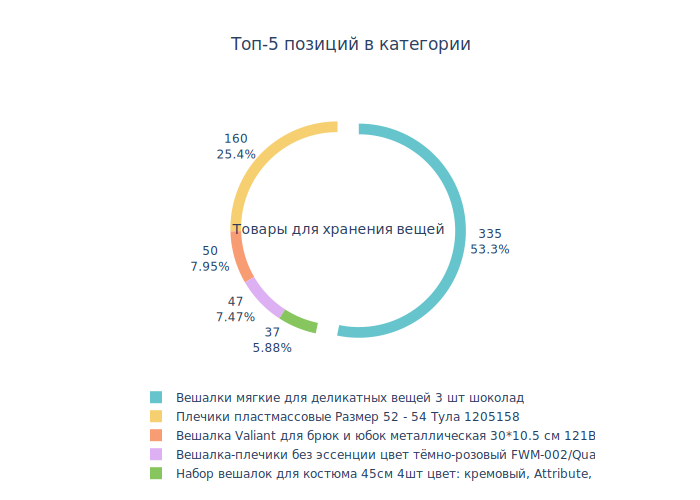

,product,quantity
0,Вешалки мягкие для деликатных вещей 3 шт шоколад,335
1,Плечики пластмассовые Размер 52 - 54 Тула 1205158,160
2,Вешалка Valiant для брюк и юбок металлическая ...,50
3,Вешалка-плечики без эссенции цвет тёмно-розовы...,47
4,Набор вешалок для костюма 45см 4шт цвет: кремо...,37


In [77]:
create_top_5(data,"Товары для хранения вещей","product","quantity")

Очень популярны Вешалки мягкие для деликатных вещей, их продано - 335 единиц. Следом идут Плечики пластмассовые Размер 52 - 54 со 160 проданными единицами, Третье место у Вешалка Valiant для брюк и юбок - 50 проданных штук. Предпоследнее место у Вешалка-плечики без эссенции - 47 проданных штук. Замыкает список топ-5 позиция - Набор вешалок для костюма 45см - 37 реализованных единиц.

Следующая категория "Хозтовары":

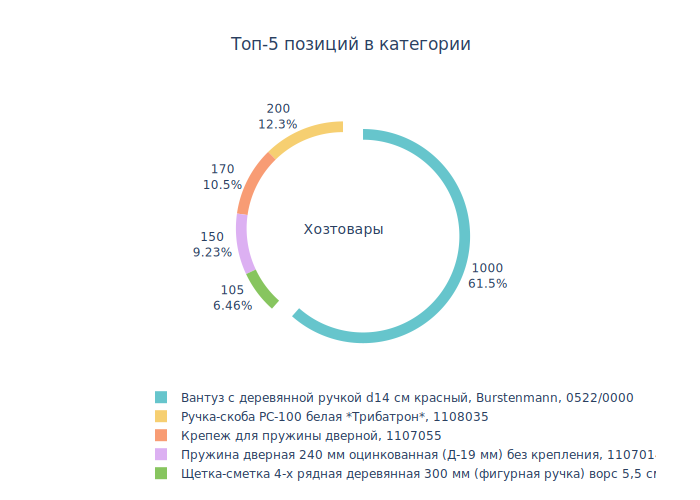

,product,quantity
0,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000
1,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",200
2,"Крепеж для пружины дверной, 1107055",170
3,Пружина дверная 240 мм оцинкованная (Д-19 мм) ...,150
4,Щетка-сметка 4-х рядная деревянная 300 мм (фиг...,105


In [78]:
create_top_5(data,"Хозтовары","product","quantity")

Первое место у Вантузов с деревянной ручкой(если все же менеджер не сообщит, что заказ отменен) с продажей 1000 товарных единиц. Второе место у Ручка-скоба РС-100 - 200 проданных штук. Третье место у крепежа для пружины дверной - 170 проданных единиц. Четвертое - Пружина дверная 240 мм оцинкованная со 150 продажами, последнее место у - Щетка-сметка 4-х рядная деревянная со 105 проданными единицами.

Посмотрим теперь на категорию "Хозяйственный инвентарь":

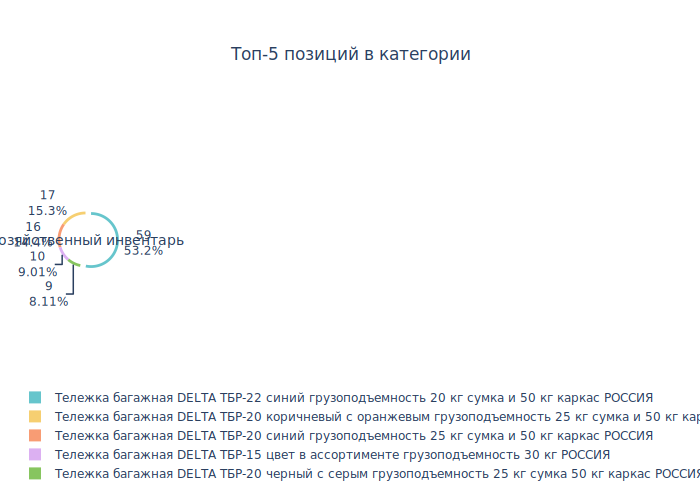

,product,quantity
0,Тележка багажная DELTA ТБР-22 синий грузоподъе...,59
1,Тележка багажная DELTA ТБР-20 коричневый с ора...,17
2,Тележка багажная DELTA ТБР-20 синий грузоподъе...,16
3,Тележка багажная DELTA ТБР-15 цвет в ассортиме...,10
4,Тележка багажная DELTA ТБР-20 черный с серым г...,9


In [79]:
create_top_5(data,"Хозяйственный инвентарь","product","quantity")

Все 5 позиций у тележок. Первое место  - Тележка багажная DELTA ТБР-22 с 59 продажами. Второе место - Тележка багажная DELTA ТБР-20 коричневый с 17 продажами. Третье - Тележка багажная DELTA ТБР-20 синий с 16 продажами. Предпоследнее место занимает Тележка багажная DELTA ТБР-15 - реализовано 10 единиц. Замыкает пятерку позиция - Тележка багажная DELTA ТБР-20 черный с 9 продажами.

### 4.5 ABC-Анализ

Принцип ABC-Анализа заключается в том, чтоб разделить ассортимент на категории:
- A - Имеющие наибольшую ценность, около 20% продукции приносят 80% продаж;
- B - Промежуточные товары, около 30% продукции приносят 15% продаж;
- C - Наименее ценные товары, в количестве около 50%, приносящие 5% продаж.

Для начала создадим переменную, для расчетов:

In [80]:
#Группируем по продукту - суммарную выручку, в порядке убывания по ней.
ABC = data.groupby('product').agg({'quantity':'sum','revenue': 'sum'}).sort_values('revenue',ascending = False)

Посмотрим на полученные данные:

In [81]:
ABC

,quantity,revenue
product,,
"Вантуз с деревянной ручкой d14 см красный, Burstenmann, 0522/0000",1000,"675,000.00"
Простынь вафельная 200х180 см WELLNESS RW180-01 100% хлопок,30,"53,232.00"
Сумка-тележка 2-х колесная Gimi Argo синяя,47,"50,405.00"
Вешалки мягкие для деликатных вещей 3 шт шоколад,335,"49,596.00"
Тележка багажная DELTA ТБР-22 синий грузоподъемность 20 кг сумка и 50 кг каркас РОССИЯ,59,"33,992.00"
...,...,...
"Цинния Оранжевый король 0,5 г 4660010770520",1,10.00
Морковь Детская сладость 2 г 4660010775921,1,10.00
"Огурец Засолочный 0,3 г 4660010776102",1,10.00


Создадим необходимые столбцы:

In [82]:
ABC['revenue_cumsum'] = ABC['revenue'].cumsum() # Кумулятивная выручка
ABC['revenue_total'] = ABC['revenue'].sum() # Сумарная выручка
ABC['revenue_running_percentage'] = (ABC['revenue_cumsum'] / ABC['revenue_total']) * 100 # Нахождение кумулятивного процента продаж

Посмотрим на полученный результат:

In [83]:
ABC.head() 

,quantity,revenue,revenue_cumsum,revenue_total,revenue_running_percentage
product,,,,,
"Вантуз с деревянной ручкой d14 см красный, Burstenmann, 0522/0000",1000,"675,000.00","675,000.00","4,107,363.00",16.43
Простынь вафельная 200х180 см WELLNESS RW180-01 100% хлопок,30,"53,232.00","728,232.00","4,107,363.00",17.73
Сумка-тележка 2-х колесная Gimi Argo синяя,47,"50,405.00","778,637.00","4,107,363.00",18.96
Вешалки мягкие для деликатных вещей 3 шт шоколад,335,"49,596.00","828,233.00","4,107,363.00",20.16
Тележка багажная DELTA ТБР-22 синий грузоподъемность 20 кг сумка и 50 кг каркас РОССИЯ,59,"33,992.00","862,225.00","4,107,363.00",20.99


Теперь созаздадим функцию для определения товара по категориям ABC:

In [84]:
def classify_product(percentage):
    """Функция для определения категории ABC. 
    
    с помощью apply для столбца с куммулятивным процентом 
    будет применяться функция, на выходе получим категорию.
    """
    
    if percentage > 0 and percentage <= 80:
        return 'A'
    elif percentage > 80 and percentage <= 95:
        return 'B'
    else:
        return 'C'

Применим созданную функцию:

In [85]:
ABC['abc_class'] = ABC['revenue_running_percentage'].apply(classify_product)
ABC = ABC.reset_index()

Посмотрим на полученный датасет:

In [86]:
ABC.sample(5)

,product,quantity,revenue,revenue_cumsum,revenue_total,revenue_running_percentage,abc_class
1872,Пуансеттия в горшке D12 см белая с красным,1,135.00,"4,070,028.00","4,107,363.00",99.09,C
1952,"Рассада Огурца сорт Магнат, кассета по 6шт",1,120.00,"4,080,240.00","4,107,363.00",99.34,C
728,Герань домашняя (пеларгония зональная) цветуща...,7,"1,051.00","3,528,735.00","4,107,363.00",85.91,B
831,Скатерть Жаклин 50% полиэфир 50% хлопок квадра...,1,899.00,"3,629,479.00","4,107,363.00",88.37,B
971,Пеларгония розебудная Apple Blossom укорененны...,5,745.00,"3,744,766.00","4,107,363.00",91.17,B


Создадим информационную таблицу:

In [87]:
ABC_info = ABC.groupby('abc_class').agg( # Группируем по классу
    total_count=('product', 'count'), # По количеству уникальной продукции
    total_quantity=('quantity', sum), # По количеству проданного
    total_revenue=('revenue', sum)) # По выручке
ABC_info['part_of_count'] = ABC_info['total_count'] / ABC_info['total_count'].sum() * 100 # Процент от количества продукции
ABC_info['part_of_revenue'] = ABC_info['total_revenue'] / ABC_info['total_revenue'].sum() * 100 # Процент от выручки

Посмотрим на полученную информацию:

In [88]:
ABC_info

,total_count,total_quantity,total_revenue,part_of_count,part_of_revenue
abc_class,,,,,
A,542,8093,"3,285,162.00",23.14,79.98
B,700,3278,"616,637.00",29.89,15.01
C,1100,2185,"205,564.00",46.97,5.00


Также визуально:

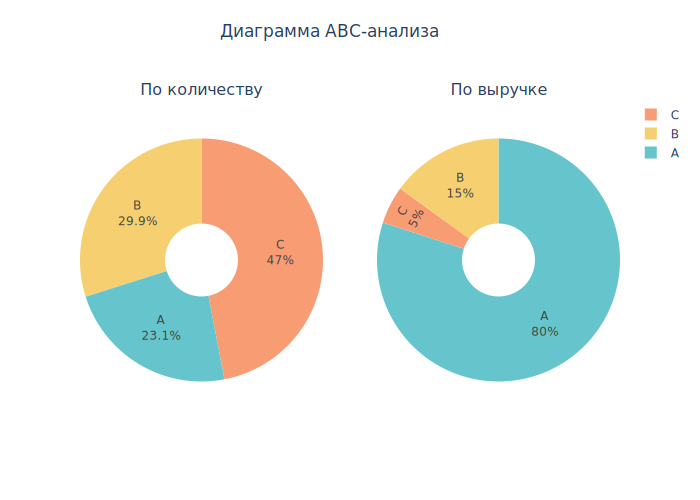

In [89]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],subplot_titles=("По количеству", "По выручке"))


fig.add_trace(go.Pie(labels=ABC_info.index, values=ABC_info['part_of_count'],hole=.3, textinfo='label + percent',
     name="Количество", marker_colors=px.colors.qualitative.Pastel),
     row=1, col=1)

fig.add_trace(go.Pie(
     labels=ABC_info.index, values=ABC_info['part_of_revenue'],hole=.3, textinfo='label + percent',
     name="Выручка"),
     row=1, col=2)
fig.update_layout(title={'text': "Диаграмма ABC-анализа ", 'xanchor': 'center', 'y':0.95,
        'x':0.47} ,)
fig.show("svg")

**Вывод:** Успешно применили ABC анализ. Таким образом:
* Категория A, при доле количества 23,1 % дает 80% выручки;
* Категория B, при доле количества 29,9 % дает 15% выручки;
* Категория C, при  доле количества 47% дает 5% выручки.

### 4.6 Кластеризация 

В рамках кластеризации нужно выявить типы ассортимента. Ранее мы создали датасет ABC, будем работать с ним. Для начала стандартизируем данные:

In [90]:
sc = StandardScaler()
X_sc = sc.fit_transform(ABC[['revenue', 'quantity', 'revenue_cumsum', 'revenue_running_percentage']])

Сохраним в переменную матрицу расстояний:

In [91]:
linked = linkage(X_sc, method = 'ward')

Нарисуем дендограмму:

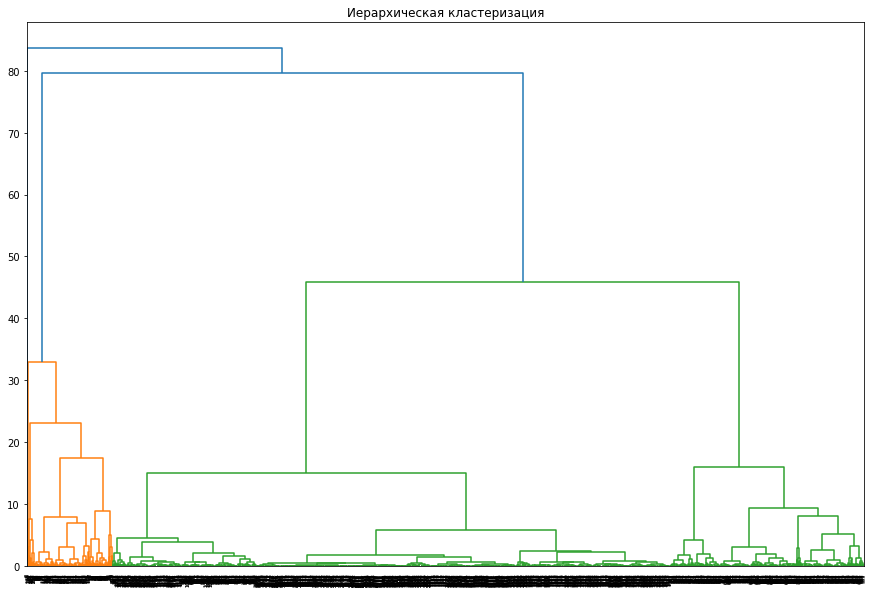

In [92]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show("svg")

Предложенное оптимальное число кластеров 2 — два разных цвета на графике

Обучим модель кластеризации на основании алгоритма K-Means:

In [93]:
# зададим число кластеров, равное 2
km = KMeans(n_clusters = 2, random_state=0) 
# спрогнозируем кластеры для наблюдений
labels = km.fit_predict(X_sc) 
# сохраним метки кластера в поле датасета
ABC['cluster_km'] = labels
#Промаркируем 0 как Дополнительный, 1 как основной
ABC['cluster_km'] = ABC['cluster_km'].apply(lambda x: 'Дополнительный' if x == 0 else 'Основной')

Построим информационную таблицу:

In [94]:
KM_info = ABC.groupby('cluster_km').agg( # Группируем по классу
    total_count=('product', 'count'), # По количеству уникальной продукции
    total_quantity=('quantity', sum), # По количеству проданного
    total_revenue=('revenue', sum)) # По выручке
KM_info['part_of_count'] = KM_info['total_count'] / KM_info['total_count'].sum() * 100 # Процент от количества продукции
KM_info['part_of_revenue'] = KM_info['total_revenue'] / KM_info['total_revenue'].sum() * 100 # Процент от выручки

Посмотрим на нее:

In [95]:
KM_info

,total_count,total_quantity,total_revenue,part_of_count,part_of_revenue
cluster_km,,,,,
Дополнительный,1921,5937,"1,041,292.00",82.02,25.35
Основной,421,7619,"3,066,071.00",17.98,74.65


Для наглядности также посмотрим визуально:

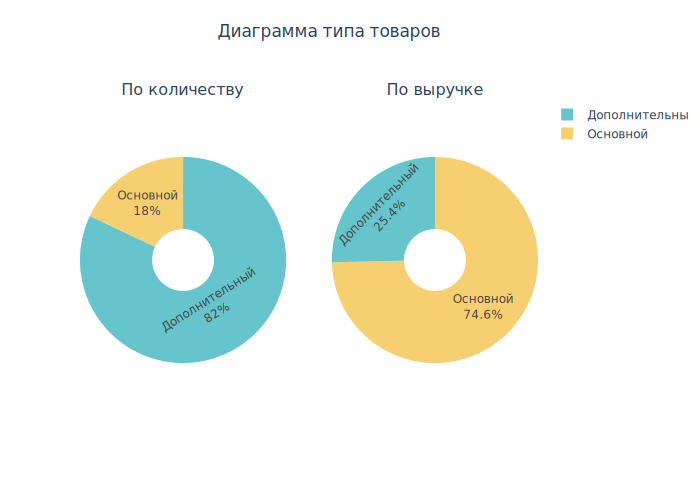

In [96]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],subplot_titles=("По количеству", "По выручке"))


fig.add_trace(go.Pie(labels=KM_info.index, values=KM_info['part_of_count'],hole=.3, textinfo='label + percent',
     name="Количество", marker_colors=px.colors.qualitative.Pastel),
     row=1, col=1)

fig.add_trace(go.Pie(
     labels=KM_info.index, values=KM_info['part_of_revenue'],hole=.3, textinfo='label + percent',
     name="Выручка"),
     row=1, col=2)
fig.update_layout(title={'text': "Диаграмма типа товаров ", 'xanchor': 'center', 'y':0.95,
        'x':0.47} ,)
fig.show("svg")

**Вывод:** Применив кластеризацию выявили два тип товаров:
* Основной при доле 18% дает 74,6% выручки;
* Дополнительный при доле 82% дает 25,4% выручки.

## Этап 5. Проверка гипотез

### 5.1 Различия в среднем чеке в будний и в выходной день

Нулевой гипотезей будет являться то, что средний чек в будний день и в выходной не различается. В то время как альтернативная , что средний чек различается.

Для этого потребуются две выборки:

In [97]:
weekday = data.query('is_weekend == "weekday"')[['revenue']] # Для будних
weekend = data.query('is_weekend == "weekend"')[['revenue']] # Для выходных

Воспользуемся критерием Стьюдента используя функцию ttest_ind из библиотеки scipy. Но для начала нужно избавиться от выбросов, так как как они влияют на критерий Стьюдента. Создидм функцию для определения нормальных значений:

In [98]:
def whiskers(df,column):
    """Данная функция для опеределения "усов"
    
    с помощью функцию describe, путем статистических данных 
    рассчитываем нормальные значения для параметра
    """
    stat = df[column].describe() # сохраним в переменную основные стат.показатели
    
    iqr = stat[6] - stat[4] # межквартирльный размах
    
    l_whisker = stat[4] - 1.5 * iqr # левый "ус" 
    r_whisker = stat[6] + 1.5 * iqr # правый "ус" 

    if l_whisker < stat[3]: l_whisker = stat[3]  # левый "ус" не меньше минимального значения
        
    if r_whisker > stat[7]: r_whisker = stat[7] # правый "ус" не больше максимального значения
        
    return [l_whisker, r_whisker]

Для будних:

In [99]:
whiskers(weekday,'revenue')

[9.0, 1675.0]

Для выходных:

In [100]:
whiskers(weekend,'revenue')

[10.0, 1511.0]

Проверим гипотезу:

In [101]:
# Зададим уровень альфа
alpha = 0.05
# Создадим переменную с результатом для сравнения.
results = st.ttest_ind(weekday.query('9 <=revenue<= 1675'), weekend.query('10 <=revenue<= 1511'))
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [0.0015743]
Отвергаем нулевую гипотезу


Как можно сделать вывод наша нулевая гипотеза отвергнута и средний чек в будний и в выходной различается.

Убедимся в этом собственноручно:

In [102]:
(data.query('(is_weekend=="weekday" and 9<=revenue<= 1675) |(is_weekend=="weekend" and 10 <=revenue<= 1511)')
.pivot_table(index='is_weekend', values='revenue', aggfunc='mean'))

,revenue
is_weekend,
weekday,364.44
weekend,319.74


По таблице видно, что средние значения отличаются.

**Вывод:** Гипотеза отвергнута, средний чек для буднего и выходного различается.

### 5.2 Различия в среднем чеке в дневное время и в ночное время

Нулевой гипотезей будет являться то, что средний чек в дневное время и в вечернее время не различается. В то время как альтернативная , что средний чек различается.

Для этого потребуются две выборки:

In [103]:
daytime = data.query('is_daytime == "daytime"')[['revenue']] # Для будних
eveningtime = data.query('is_daytime == "evening_time"')[['revenue']] # Для выходных

Определим нормальные значения чека для дневного времени:

In [104]:
whiskers(daytime,'revenue')

[9.0, 1655.0]

Для ночного времени:

In [105]:
whiskers(eveningtime,'revenue')

[9.0, 1655.0]

Проверим гипотезу:

In [106]:
# Зададим уровень альфа
alpha = 0.05
# Создадим переменную с результатом для сравнения.
results = st.ttest_ind(daytime.query('9 <=revenue<= 1655'), eveningtime.query('9 <=revenue<= 1655'))
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [0.63490798]
Не получилось отвергнуть нулевую гипотезу


Как можно сделать вывод наша нулевая гипотеза не отвергнута и средняя выручка в дневное время и в ночное не отличается.

Проверим:

In [107]:
(data.query('(is_daytime=="daytime" and 9<=revenue<= 1655) |(is_daytime=="evening_time" and 9 <=revenue<= 1655)')
.pivot_table(index='is_weekend', values='revenue', aggfunc='mean'))

,revenue
is_weekend,
weekday,363.29
weekend,348.78


По таблице видно, что средние значения схожи.

**Вывод:** Не получилось отвергнуть нулевую гипотезу, средний чек для дневного и ночного не различается.

Нулевой гипотезой будет являться то, что средняя цена для основного типа и допольнительного не отличается. Альтерантивная гипотеза, напротив - отличается:

Для этого нам потребуются 2 выборки, но прежде объединим основной датесет с кластерами:

In [108]:
data= pd.merge(data, ABC[['product','cluster_km']], on = 'product')
general = data.query('cluster_km == "Основной"')[['price']] # Для будних
additional = data.query('cluster_km == "Дополнительный"')[['price']] # Для выходных

Определим нормальные значения чека для основного типа:

In [109]:
whiskers(general,'price')

[19.0, 3170.0]

Для дополнительного типа товара:

In [110]:
whiskers(additional,'price')

[9.0, 467.5]

Проверим гипотезу:

In [111]:
alpha = 0.05
# Создадим переменную с результатом для сравнения.
results = st.ttest_ind(general.query('19 <=price<= 3170'), additional.query('9 <=price<= 467.5'))
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [1.87203665e-261]
Отвергаем нулевую гипотезу


Как можно сделать вывод наша нулевая гипотеза отвергнута и средняя цена для основного и допольнительного типов отличается.

Убедимся в этом собственноручно:

In [112]:
(data.query('(cluster_km=="Основной" and 19 <=price<= 3170) |(cluster_km=="Дополнительный" and 9 <=price<= 467.5)')
.pivot_table(index='cluster_km', values='price', aggfunc='mean'))

,price
cluster_km,
Дополнительный,133.35
Основной,694.32


Более чем в 5 раз средняя цена у основного типа товаров, больше, чем у допольнительного типа.

## Этап 6. Общий вывод

В нашем распоряжении был датасет транзакций интернет-магазина товаров для дома и быта «Пока все ещё тут», содержащий 6737 строк и 6 столбцов. Стояла задача - проанализировать ассортимент товаров для принятия решений по дальнейшему развитию продаваемых позиций. Итоговый результат – история о проведенном исследовании и полученных результатах. В ходе исследования, были сделаны следующие действия и выводы:
* На этапе знакомства с данными было сделано и выявлено:
    * данные в хорошем качестве;
    * требуется изменить тип данных для столбца с датой.
* На этапе предобработки данных было сделано и выявлено:
    * пропуски отсутствуют;
    * явных дубликатов нет;
    * были обнаружены неявные дубликаты, от которых избавились;
    * изменил тип данных у времени;
    * добавили новые столбцы, необходимые для дальнейшей работы.
* При исследовательском анализе данных было сделано и выявлено:
    * данные предоставлены с 2018-10-01 00:00:00 по 2019-10-31 16:00:00 ;
    * Количество заказов в логе -  4816;
    * Количество уникальных пользователей - 2421;
    * Количество уникальных заказов - 2784;
    * Количество уникальных наименований продукции -  2342;
    * Минимальное количество купленного товара в одном заказе- 1;
    * Максимальное количество купленного товара в одном заказе - 1000;
    * Среднее значение количества купленного товара в одном заказе - 2.81;
    * Медианое значение количества купленного товара в одном заказа - 1;
    * Количество проданного товара за все время - 13556;
    * Минимальная цена товара -  9;
    * Максимальная цена товара -  14917;
    * Средняя цена товара - 516;
    * Медианая цена товара - 150;
    * Минимальная сумма заказа - 9;
    * Максимальная сумма заказа - 675000;
    * Средняя сумма заказа - 852;
    * Медианная сумма заказа - 194;
    * Сумма дохода за все время- 4107363;
    * 75% заказов, имееют всего 1 позицию по количеству;
    * Наибольшее число заказов можно увидеть в когорте октября 2018 года - 345 заказов;
    * В разрезе когорт, в течении времени, практически нет повторых заказов;
    * С Февраля по Апрель, самый пик заказов и посетилей.
* На этапе сегментации товаров было сделано и выявлено:
    * Разделение товаров на категории;
    * По месячной сезонности:
        * У растений явно виден пик спроса с Февраля по Июнь, достигая своего апогея в апреле - 969 единиц. ;
        * У текстиля виден пик в ноябре 2018 года - 82 единицы, потом идет стабильный спад и затем лишь в Июне рост до 67 - единиц;
        * Для товаров ванной комнаты - Октябрь 2018 года и Февраль 2019 года наилучшие месяцы, со 113 и 115 проданными единицами, также с Сентября виден рост;
        * Заметный спрос на кухонные принадлежности в Ноябре 2018 года - 620 реализованных продаж, затем видно снижение количества проданной продукции в данной категории, лишь в Мае видится рост до 330 единиц. Летом данная категория не очень пользуется спросом; (Менеджерам стоит обратить внимание на данное явление и на ассортимент товаров для кухни);
        * Для категории "Товары для хранения вещей" виден заметный пик в июне, затем резкий спад, быть может Магазин выводит данную категорию товаров из ассортимента, если же нет, то Менеджерам стоит обратить внимание на малые продажи в данной категории;
        * Для хозтоваров лучшие месяцы - Октяьрь 2018 года и Июнь 2019 года, но в Июне имеется продажа одним заказом 1000 вантусов, если брать в расчет, что данный заказ неошибочный, по сравнению с Октябрем прошло года, в 2019 году, замтное снижение спроса на данную категорию;
        * Хозяйственный инвентарь хорошо продавался лишь в Декабре 2018 года, остальные месяцы продажи минимальные.
     * по недельной сезонности:
        * В первую неделю года у категории "Растения" нет продаж совсем, с 13 по 23 самое сезонное время, которое достигает пика, на 17 и 20 неделе, с 394 и 397 проданными позициями;
        * У текстиля на 15 и на 44 неделе нет продаж, зато наблюдяается 3 пика, в 45 неделе 2018 года - 35 единиц, 3 неделя - 33 единиц и достигаем своего апогея данная категория товаров на 23 неделе - 49 единиц;
        * Для товаров ванной комнаты пики в 8,9 и 14 неделю 2019 года, 49,57 и 67 проданных товарных единиц соответственно;
        * Для категории "Товары для кухни" имеется 2 пика 44 неделя 2018 года с 373 проданными единицами и 21 неделя 2019 года с 303 проданными позициями, послее нет идет резкое пике, в 15,неделю 2019 года нет продаж вообще;
        * Для категории "Товары для хранения вещей" 2 роста, 12 неделя 2019 года с0 154 продажами и 24 неделя 2019 года с 357 продажами, также есть недели, когда не было продаж совсем - 10,18,21,32 недели 2019 года;
        * Хозтовары имеют пики в 42 неделю 2018 года и 25 неделя 2019 года, но тут нужно учитывать, что на 25 неделе были те самые вантусы;
        * Хозяйственный инвентарь имеет пике в прендновогодюю 51 неделю в 2018 году, нет продаж в 4,16,17,35 недели 2019 года.
    * были выявлены топ-5 самый продаваемых товаров из каждой категории:
    * ABC анализ выявил:
        * Категория A, при доле количества 23,1 % дает 80% выручки;
        * Категория B, при доле количества 29,9 % дает 15% выручки;
        * Категория C, при  доле количества 47% дает 5% выручки.
    * с помощью кластеризации были выявлены основной и допольнительный тип товаров:
        * Основной при доле 18% дает 74,6% выручки;
        * Дополнительный при доле 82% дает 25,4% выручки.
    * На этапе проверке гипотез было выявлено:
        * Средний чек для буднего и выходного различается,  нулевая гипотеза отвергнута;
        * Средний чек для дневного и ночного не различается, не получилось отвергнуть нулевую гипотезу.
    
    
**Рекомендации:** 
* С Февраля по Апрель, самый пик заказов и посетилей, в то же время по выручке не видно особой корреляции с этим фактом. Менеджерам стоит присмотреться к ассортементу своего магазина, ибо наблюдается картина, когда растет количество заказов и покупателей, выручка же непропорцианальна данному явлению.
* Практически нет повторных заказов. Менеджерам стоит обратить внимание на данный немаловажный факт. Менеджерам следует выявить с чем это связано, вполне возможно, при содействии отдела маркетинга, путем анкетирования и выявления проблемых моментов, а также путем внедрения акций, можно было бы увеличить количество повторных заказов.
* Решить проблему с дубликатами заказов;
* Обратить внимание на заказ 71743, где 1000 вантузов.
* На основе полученной информации составить план закупок ассортимента.